# EDA: MELI Market Place Exercise

Exploratory Data Analysis for the MELI Marketplace exercise dataset.

## 1. Data Loading

In [347]:
import json
import numpy as np
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

pd.set_option('display.max_columns', 60)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [348]:
data = [json.loads(x) for x in open("MLA_100k_checked_v3.jsonlines")]

In [349]:
def flatten_dict(d, parent_key='', sep='_'):
    """
    Recursively flattens a nested dictionary.
    
    Args:
        d (dict): Dictionary to flatten.
        parent_key (str): Key from parent level.
        sep (str): Separator between nested keys.
    Returns:
        dict: Flattened dictionary.
    """
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            # If list has exactly one element, unwrap it
            if len(v) == 1:
                # If the single element is a dict, flatten it recursively
                if isinstance(v[0], dict):
                    items.extend(flatten_dict(v[0], new_key, sep=sep).items())
                else:
                    # Otherwise just keep the single value
                    items.append((new_key, v[0]))
            else:
                # Keep lists with 0 or multiple elements as-is
                items.append((new_key, v))
        else:
            items.append((new_key, v))
    return dict(items)

def json_to_df(data):
    """
    Converts a list of JSON objects to a pandas DataFrame.
    It handles nested structure by creating separate columns for nested fields.
    Supports arbitrary levels of nesting.

    Args:
        data (list): List of JSON objects.
    Returns:
        pd.DataFrame: DataFrame representation of the JSON data.
    """

    records = []
    for item in tqdm(data):
        flattened = flatten_dict(item)
        records.append(flattened)
    
    return pd.DataFrame(records)

In [350]:
df = json_to_df(data)

100%|██████████| 100000/100000 [00:14<00:00, 6912.20it/s]


In [351]:
df.head(5)

,seller_address_country_name,seller_address_country_id,seller_address_state_name,seller_address_state_id,seller_address_city_name,seller_address_city_id,warranty,sub_status,condition,deal_ids,base_price,shipping_local_pick_up,shipping_methods,shipping_tags,shipping_free_shipping,shipping_mode,shipping_dimensions,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,...,pictures_size,pictures_secure_url,pictures_max_size,pictures_url,pictures_quality,pictures_id,variations_attribute_combinations,variations_seller_custom_field,variations_picture_ids,variations_sold_quantity,variations_available_quantity,variations_id,variations_price,shipping_free_methods_rule_value,shipping_free_methods_rule_free_mode,shipping_free_methods_id,attributes_value_id,attributes_attribute_group_id,attributes_name,attributes_value_name,attributes_attribute_group_name,attributes_id,non_mercado_pago_payment_methods_description,non_mercado_pago_payment_methods_id,non_mercado_pago_payment_methods_type,variations_attribute_combinations_value_id,variations_attribute_combinations_name,variations_attribute_combinations_value_name,variations_attribute_combinations_id,shipping_free_methods
0,Argentina,AR,Capital Federal,AR-C,San Cristóbal,TUxBQlNBTjkwNTZa,None,[],new,[],80.00,True,[],[],False,not_specified,None,"[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.00,[],buy_it_now,dragged_bids_and_visits,,MLA6553902747,[],MLA126406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,AR,Capital Federal,AR-C,Buenos Aires,,NUESTRA REPUTACION,[],used,[],2650.00,True,[],[],False,me2,None,"[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.00,[],buy_it_now,[],,MLA7727150374,[],MLA10267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,AR,Capital Federal,AR-C,Boedo,TUxBQkJPRTQ0OTRa,None,[],used,[],60.00,True,[],[],False,me2,None,"[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.00,[],buy_it_now,dragged_bids_and_visits,,MLA6561247998,[],MLA1227,...,375x500,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,900x1200,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,,22076-MLA7367189936_012015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,AR,Capital Federal,AR-C,Floresta,TUxBQkZMTzg5MjFa,None,[],new,[],580.00,True,[],[],False,me2,None,"[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.00,[],buy_it_now,[],,None,[],MLA86345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,AR,Buenos Aires,AR-B,Tres de febrero,TUxBQ1RSRTMxODE5NA,MI REPUTACION.,[],used,[],30.00,True,[],[],False,not_specified,None,"[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,30.00,[],buy_it_now,dragged_bids_and_visits,,MLA3133256685,[],MLA41287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [352]:
target_proportion = df['condition'].value_counts(dropna=False, normalize=True)
target_proportion

condition
new    0.54
used   0.46
Name: proportion, dtype: float64

## 2. Data Transformation & Feature Treatment

In [353]:
df.sample(5)

,seller_address_country_name,seller_address_country_id,seller_address_state_name,seller_address_state_id,seller_address_city_name,seller_address_city_id,warranty,sub_status,condition,deal_ids,base_price,shipping_local_pick_up,shipping_methods,shipping_tags,shipping_free_shipping,shipping_mode,shipping_dimensions,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,...,pictures_size,pictures_secure_url,pictures_max_size,pictures_url,pictures_quality,pictures_id,variations_attribute_combinations,variations_seller_custom_field,variations_picture_ids,variations_sold_quantity,variations_available_quantity,variations_id,variations_price,shipping_free_methods_rule_value,shipping_free_methods_rule_free_mode,shipping_free_methods_id,attributes_value_id,attributes_attribute_group_id,attributes_name,attributes_value_name,attributes_attribute_group_name,attributes_id,non_mercado_pago_payment_methods_description,non_mercado_pago_payment_methods_id,non_mercado_pago_payment_methods_type,variations_attribute_combinations_value_id,variations_attribute_combinations_name,variations_attribute_combinations_value_name,variations_attribute_combinations_id,shipping_free_methods
25484,Argentina,AR,Capital Federal,AR-C,Villa Crespo,TUxBQlZJTDQyMjBa,None,[],new,[],1520.00,False,[],[],False,me2,None,[],4886958648,[],MLA,gold_special,1520.00,"[{'value_id': '', 'attribute_group_id': 'DFLT'...",buy_it_now,dragged_bids_and_visits,,MLA8558850100,[],MLA60611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15784,Argentina,AR,Buenos Aires,AR-B,San Isidro,TUxBQ1NBTjg4ZmJk,None,[],new,[],229.99,False,[],[],False,custom,None,"[{'description': 'Transferencia bancaria', 'id...",8751528254,[],MLA,bronze,229.99,[],buy_it_now,dragged_bids_and_visits,,MLA1079462433,[],MLA73720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30691,Argentina,AR,Capital Federal,AR-C,CABA,,None,[],used,[],130.00,True,[],[],False,not_specified,None,NaN,4979447232,[],MLA,free,130.00,[],buy_it_now,dragged_bids_and_visits,,MLA4314381061,[],MLA1207,...,500x332,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1200x797,http://mla-s1-p.mlstatic.com/18259-MLA30590898...,,18259-MLA3059089843_082014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,NaN
34312,Argentina,AR,Capital Federal,AR-C,Ciudad Autonoma,,None,[],new,[],190.00,False,[],[],False,me2,None,[],1662065732,[{'attribute_combinations': [{'value_id': '920...,MLA,bronze,190.00,"[{'value_id': 'male', 'attribute_group_id': 'D...",buy_it_now,dragged_bids_and_visits,,MLA2592328373,[],MLA119287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87305,Argentina,AR,Capital Federal,AR-C,San Telmo,TUxBQlNBTjgxMzNa,SI NO ES LO PUBLICADO TE DEVOLVEMOS EL DINERO....,[],used,[],11800.00,True,[],[],False,custom,None,"[{'description': 'Transferencia bancaria', 'id...",8894278998,[],MLA,bronze,11800.00,[],buy_it_now,[],,None,[],MLA47312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [354]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 85 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   seller_address_country_name                   100000 non-null  object 
 1   seller_address_country_id                     100000 non-null  object 
 2   seller_address_state_name                     100000 non-null  object 
 3   seller_address_state_id                       100000 non-null  object 
 4   seller_address_city_name                      100000 non-null  object 
 5   seller_address_city_id                        100000 non-null  object 
 6   warranty                                      39104 non-null   object 
 7   sub_status                                    100000 non-null  object 
 8   condition                                     100000 non-null  object 
 9   deal_ids                                      100

### Dealing with null values

In [355]:
base_null = np.round((df.isna().sum()/len(df))*100,2).reset_index().rename(
    columns={0:'percent_missing', 'index':'column_name'}
).sort_values(by='percent_missing', ascending=False).reset_index(drop=True)

base_null[base_null['percent_missing'] > 0]

,column_name,percent_missing
0,differential_pricing,100.00
1,shipping_free_methods_rule_value,100.00
2,shipping_free_methods,100.00
3,subtitle,100.00
4,catalog_product_id,99.99
5,variations_seller_custom_field,99.98
6,shipping_dimensions,99.98
7,original_price,99.86
8,variations_attribute_combinations_value_name,99.36
9,variations_attribute_combinations_id,99.36


To find the real distribution of null values, empty lists and empty strings will be replaced with null values.

In [356]:
def fix_null_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Fix null values in the DataFrame by filling them with appropriate defaults and
    replacing empty strings and empty lists with NaN
    
    Args:
        df (pd.DataFrame): Input DataFrame with potential null values.
    Returns:
        pd.DataFrame: DataFrame with null values fixed.
    """
    df_copy = df.copy()
    for column in tqdm(df_copy.columns):
        if df_copy[column].dtype == 'object':
            df_copy[column] = df_copy[column].fillna(np.nan)
            # Replaces empty strings with only whitespace with NaN
            df_copy[column] = df_copy[column].replace(r'^\s*$', np.nan, regex=True)
            df_copy[column] = df_copy[column].apply(
                lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x
            )
        elif df_copy[column].dtype in ['int64', 'float64']:
            df_copy[column] = df_copy[column].fillna(np.nan)
        elif df_copy[column].dtype == 'bool':
            df_copy[column] = df_copy[column].fillna(False)
    return df_copy

df_fixed = fix_null_values(df)

 29%|██▉       | 25/85 [00:02<00:07,  8.55it/s]/var/folders/qz/t3xngt5n55v6gsn11qg9d2fm0000gn/T/ipykernel_64483/338441328.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[column] = df_copy[column].replace(r'^\s*$', np.nan, regex=True)
 41%|████      | 35/85 [00:04<00:08,  5.95it/s]/var/folders/qz/t3xngt5n55v6gsn11qg9d2fm0000gn/T/ipykernel_64483/338441328.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[column] = df_copy[column].fillna(np.nan)
100%|██████████| 85/85 [00:08<00:00, 10.59it/s]


In [357]:
df_fixed.sample(5)

,seller_address_country_name,seller_address_country_id,seller_address_state_name,seller_address_state_id,seller_address_city_name,seller_address_city_id,warranty,sub_status,condition,deal_ids,base_price,shipping_local_pick_up,shipping_methods,shipping_tags,shipping_free_shipping,shipping_mode,shipping_dimensions,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,...,pictures_size,pictures_secure_url,pictures_max_size,pictures_url,pictures_quality,pictures_id,variations_attribute_combinations,variations_seller_custom_field,variations_picture_ids,variations_sold_quantity,variations_available_quantity,variations_id,variations_price,shipping_free_methods_rule_value,shipping_free_methods_rule_free_mode,shipping_free_methods_id,attributes_value_id,attributes_attribute_group_id,attributes_name,attributes_value_name,attributes_attribute_group_name,attributes_id,non_mercado_pago_payment_methods_description,non_mercado_pago_payment_methods_id,non_mercado_pago_payment_methods_type,variations_attribute_combinations_value_id,variations_attribute_combinations_name,variations_attribute_combinations_value_name,variations_attribute_combinations_id,shipping_free_methods
84418,Argentina,AR,Capital Federal,AR-C,Buenos Aires,NaN,NaN,NaN,used,NaN,35.00,True,NaN,NaN,False,custom,NaN,"[{'description': 'Transferencia bancaria', 'id...",6782638214,NaN,MLA,bronze,35.00,NaN,buy_it_now,dragged_bids_and_visits,NaN,MLA4326016680,NaN,MLA1227,...,420x500,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,541x644,http://mla-s2-p.mlstatic.com/10248-MLA52035466...,NaN,10248-MLA5203546639_012014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45046,Argentina,AR,Buenos Aires,AR-B,San Antonio De Padua,NaN,NaN,NaN,new,NaN,158.99,True,NaN,NaN,False,me2,NaN,NaN,7727851484,NaN,MLA,gold,158.99,NaN,buy_it_now,dragged_bids_and_visits,NaN,MLA4975798817,NaN,MLA371068,...,500x500,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1200x1200,http://mla-s1-p.mlstatic.com/21915-MLA61581373...,NaN,21915-MLA6158137389_012015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,NaN
19957,Argentina,AR,Santa Fe,AR-S,ROSARIO,TUxBQ1JPUzg1Yjg3,NaN,NaN,used,NaN,280.00,True,NaN,NaN,False,me2,NaN,"[{'description': 'Transferencia bancaria', 'id...",7694743641,NaN,MLA,bronze,280.00,NaN,buy_it_now,dragged_bids_and_visits,NaN,MLA1964983157,NaN,MLA15208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47002,Argentina,AR,Capital Federal,AR-C,capital federal,NaN,NaN,NaN,new,NaN,220.00,True,NaN,NaN,False,me2,NaN,"[{'description': 'Transferencia bancaria', 'id...",1989541534,NaN,MLA,bronze,220.00,NaN,buy_it_now,dragged_bids_and_visits,NaN,MLA9220697184,NaN,MLA29362,...,380x500,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,390x512,http://mla-s1-p.mlstatic.com/563701-MLA3986065...,NaN,563701-MLA3986065592_082015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8978,Argentina,AR,Buenos Aires,AR-B,La Plata,TUxBQ0xBUGxhdGE,NaN,NaN,used,NaN,90.00,True,NaN,NaN,False,me2,NaN,NaN,8881187811,NaN,MLA,bronze,90.00,NaN,buy_it_now,dragged_bids_and_visits,NaN,MLA7293799744,NaN,MLA11456,...,363x500,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,873x1200,http://mla-s2-p.mlstatic.com/5082-MLA694464063...,NaN,5082-MLA6944640638_042013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
null_df = np.round((df_fixed.isna().sum()/len(df_fixed))*100,2).reset_index().rename(
    columns={0:'percent_missing', 'index':'column_name'}
)
null_df[null_df['percent_missing'] > 0].sort_values(by='percent_missing', ascending=False).reset_index(drop=True)

,column_name,percent_missing
0,shipping_methods,100.00
1,coverage_areas,100.00
2,listing_source,100.00
3,differential_pricing,100.00
4,pictures_quality,100.00
5,subtitle,100.00
6,shipping_free_methods,100.00
7,shipping_free_methods_rule_value,100.00
8,catalog_product_id,99.99
9,variations_seller_custom_field,99.98


In [359]:
null_df[null_df['percent_missing'] > 95]

,column_name,percent_missing
7,sub_status,99.01
9,deal_ids,99.76
12,shipping_methods,100.00
13,shipping_tags,99.93
16,shipping_dimensions,99.98
19,variations,97.75
26,listing_source,100.00
28,coverage_areas,100.00
35,official_store_id,99.18
36,differential_pricing,100.00


Fields with null value distribution = 100% and fields related to ids with more than 95% null value distribution are dropped.
ID related fields are dropped as these are random alphanumeric values.

In [360]:
to_drop = []
null_100 = to_drop.extend(null_df[null_df['percent_missing'] == 100]['column_name'].tolist())
null_95_ids = to_drop.extend([
    column 
    for column in null_df[null_df['percent_missing'] > 95]['column_name'].tolist() 
    if '_id_' in column or '_id' in column
])

df_fixed = df_fixed.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns:")
to_drop

Dropped 18 columns:


['shipping_methods',
 'listing_source',
 'coverage_areas',
 'differential_pricing',
 'subtitle',
 'pictures_quality',
 'shipping_free_methods_rule_value',
 'shipping_free_methods',
 'deal_ids',
 'official_store_id',
 'video_id',
 'catalog_product_id',
 'shipping_free_methods_id',
 'attributes_value_id',
 'attributes_attribute_group_id',
 'attributes_id',
 'variations_attribute_combinations_value_id',
 'variations_attribute_combinations_id']

In [361]:
null_df = np.round((df_fixed.isna().sum()/len(df_fixed))*100,2).reset_index().rename(
    columns={0:'percent_missing', 'index':'column_name'}
)

null_df[null_df['percent_missing'] > 0].sort_values(by='percent_missing', ascending=False).reset_index(drop=True)

,column_name,percent_missing
0,variations_seller_custom_field,99.98
1,shipping_dimensions,99.98
2,shipping_tags,99.93
3,original_price,99.86
4,variations_attribute_combinations_value_name,99.36
5,variations_attribute_combinations_name,99.36
6,sub_status,99.01
7,attributes_value_name,98.66
8,attributes_attribute_group_name,98.46
9,attributes_name,98.46


In [362]:
null_df[null_df['percent_missing'] > 95].sort_values(by='percent_missing', ascending=False).reset_index(drop=True)

,column_name,percent_missing
0,shipping_dimensions,99.98
1,variations_seller_custom_field,99.98
2,shipping_tags,99.93
3,original_price,99.86
4,variations_attribute_combinations_name,99.36
5,variations_attribute_combinations_value_name,99.36
6,sub_status,99.01
7,attributes_value_name,98.66
8,attributes_attribute_group_name,98.46
9,attributes_name,98.46


Remaining fields with null distribution greater than 95% are reviewed. Specifically, the distribution of values over the
target field is analyzed. If all the non-values of a field are related to just one of the two categories, the field is kept
and changed to a boolean indicator.

In [363]:
# Analyze and convert fields with >95% null values to boolean indicators
# if all non-null values belong to only one target category
fields_to_convert = []
fields_to_drop = []

columns = (
    null_df[null_df['percent_missing'] > 95]
    .sort_values(by='percent_missing', ascending=False)
    .reset_index(drop=True)['column_name']
)

for column in columns:
    # Get condition distribution for non-null values
    condition_dist = df_fixed[df_fixed[column].notna()]['condition'].value_counts()
    
    # Check if all non-null values belong to only one category
    if len(condition_dist) == 1:
        # Single category - convert to boolean indicator
        category = condition_dist.index[0]
        print(f"Converting '{column}' to boolean indicator (all non-null are '{category}')")
        df_fixed[f'{column}_indicator'] = df_fixed[column].notna().astype(bool)
        fields_to_convert.append(column)
        # Drop the original column
        df_fixed = df_fixed.drop(columns=[column])
    else:
        print(f"Field '{column}' has mixed categories: {dict(condition_dist)}")
        df_fixed = df_fixed.drop(columns=[column])
        print(f"Field '{column}' dropped due to mixed categories and high null value distribution.")

print(f"\nConverted {len(fields_to_convert)} fields to boolean indicators:")
print(fields_to_convert)

Converting 'shipping_dimensions' to boolean indicator (all non-null are 'new')
Converting 'variations_seller_custom_field' to boolean indicator (all non-null are 'new')
Field 'shipping_tags' has mixed categories: {'new': np.int64(46), 'used': np.int64(23)}
Field 'shipping_tags' dropped due to mixed categories and high null value distribution.
Converting 'original_price' to boolean indicator (all non-null are 'new')
Field 'variations_attribute_combinations_name' has mixed categories: {'new': np.int64(451), 'used': np.int64(190)}
Field 'variations_attribute_combinations_name' dropped due to mixed categories and high null value distribution.
Field 'variations_attribute_combinations_value_name' has mixed categories: {'new': np.int64(451), 'used': np.int64(190)}
Field 'variations_attribute_combinations_value_name' dropped due to mixed categories and high null value distribution.
Field 'sub_status' has mixed categories: {'new': np.int64(550), 'used': np.int64(436)}
Field 'sub_status' dropped

Fields between 60% and 95% null value distribution are reviewed also.

In [364]:
(
    null_df[(null_df['percent_missing'] > 60) & (null_df['percent_missing'] < 95)]
    .sort_values(by='percent_missing', ascending=False)
    .reset_index(drop=True)
)

,column_name,percent_missing
0,variations_attribute_combinations,94.70
1,variations_available_quantity,94.06
2,variations_sold_quantity,94.06
3,variations_price,94.06
4,variations_id,94.06
5,variations_picture_ids,94.06
6,attributes,89.12
7,non_mercado_pago_payment_methods_description,83.79
8,non_mercado_pago_payment_methods_id,83.79
9,non_mercado_pago_payment_methods_type,83.79


ID fields are removed as they are random alphanumeric values.

In [365]:
null_60_95 = (
    null_df[(null_df['percent_missing'] > 60) & (null_df['percent_missing'] < 95)]
    .sort_values(by='percent_missing', ascending=False)
    .reset_index(drop=True)
)
to_drop = [column for column in null_60_95['column_name'].to_list() if ('_id_' in column or '_id' in column)]
df_fixed = df_fixed.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns:")
to_drop

Dropped 4 columns:


['variations_id',
 'variations_picture_ids',
 'non_mercado_pago_payment_methods_id',
 'pictures_id']

In [366]:
null_df = np.round((df_fixed.isna().sum()/len(df_fixed))*100,2).reset_index().rename(
    columns={0:'percent_missing', 'index':'column_name'}
    )
(
    null_df[(null_df['percent_missing'] > 60) & (null_df['percent_missing'] < 95)]
    .sort_values(by='percent_missing', ascending=False)
    .reset_index(drop=True)
)

,column_name,percent_missing
0,variations_attribute_combinations,94.70
1,variations_available_quantity,94.06
2,variations_sold_quantity,94.06
3,variations_price,94.06
4,attributes,89.12
5,non_mercado_pago_payment_methods_description,83.79
6,non_mercado_pago_payment_methods_type,83.79
7,pictures_max_size,66.75
8,pictures_size,66.72
9,pictures_secure_url,66.72


In [367]:
target_proportion

condition
new    0.54
used   0.46
Name: proportion, dtype: float64

In [368]:
null_60_95 = (
    null_df[(null_df['percent_missing'] > 60) & (null_df['percent_missing'] < 95)]
    .sort_values(by='percent_missing', ascending=False)
    .reset_index(drop=True)
)
for column in null_60_95['column_name']:
    print(f"Condition distribution for non-null values in '{column}':")
    print(f"Missing percentage: {null_df[null_df['column_name'] == column]['percent_missing'].values[0]}%")
    print(df_fixed[df_fixed[column].notna()]['condition'].value_counts(normalize=True))
    print("\n")

Condition distribution for non-null values in 'variations_attribute_combinations':
Missing percentage: 94.7%
condition
used   0.61
new    0.39
Name: proportion, dtype: float64


Condition distribution for non-null values in 'variations_available_quantity':
Missing percentage: 94.06%
condition
used   0.57
new    0.43
Name: proportion, dtype: float64


Condition distribution for non-null values in 'variations_sold_quantity':
Missing percentage: 94.06%
condition
used   0.57
new    0.43
Name: proportion, dtype: float64


Condition distribution for non-null values in 'variations_price':
Missing percentage: 94.06%
condition
used   0.57
new    0.43
Name: proportion, dtype: float64


Condition distribution for non-null values in 'attributes':
Missing percentage: 89.12%
condition
new    0.57
used   0.43
Name: proportion, dtype: float64


Condition distribution for non-null values in 'non_mercado_pago_payment_methods_description':
Missing percentage: 83.79%
condition
used   0.60
new    0.40
Name

Fields with null value distribution greater than 90% except variations_attribute_combinations will be dropped as the target 
field distribution is just slightly skewed.

In [369]:
to_drop = null_60_95[null_60_95['percent_missing'] >= 90]['column_name'].to_list()
to_drop.remove('variations_attribute_combinations')
df_fixed = df_fixed.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns:")
to_drop

Dropped 3 columns:


['variations_available_quantity',
 'variations_sold_quantity',
 'variations_price']

In [370]:
null_df = np.round((df_fixed.isna().sum()/len(df_fixed))*100,2).reset_index().rename(
    columns={0:'percent_missing', 'index':'column_name'}
)
null_60_95 = (
    null_df[(null_df['percent_missing'] > 60) & (null_df['percent_missing'] < 95)]
    .sort_values(by='percent_missing', ascending=False)
    .reset_index(drop=True)
)
null_60_95

,column_name,percent_missing
0,variations_attribute_combinations,94.70
1,attributes,89.12
2,non_mercado_pago_payment_methods_description,83.79
3,non_mercado_pago_payment_methods_type,83.79
4,pictures_max_size,66.75
5,pictures_secure_url,66.72
6,pictures_size,66.72
7,pictures_url,66.72
8,warranty,60.93


In [371]:
df_fixed[df_fixed['attributes'].notna()]['condition'].value_counts(normalize=True)

condition
new    0.57
used   0.43
Name: proportion, dtype: float64

Attributes field follows very similar behavior, it is therefore dropped.

In [372]:
df_fixed = df_fixed.drop(columns=['attributes'])

In [373]:
null_df = np.round((df_fixed.isna().sum()/len(df_fixed))*100,2).reset_index().rename(
    columns={0:'percent_missing', 'index':'column_name'}
)
null_60_95 = (
    null_df[(null_df['percent_missing'] > 60) & (null_df['percent_missing'] < 95)]
    .sort_values(by='percent_missing', ascending=False)
    .reset_index(drop=True)
)
null_60_95

,column_name,percent_missing
0,variations_attribute_combinations,94.70
1,non_mercado_pago_payment_methods_description,83.79
2,non_mercado_pago_payment_methods_type,83.79
3,pictures_max_size,66.75
4,pictures_size,66.72
5,pictures_secure_url,66.72
6,pictures_url,66.72
7,warranty,60.93


In [374]:
df_fixed[['non_mercado_pago_payment_methods_type', 'non_mercado_pago_payment_methods_description']].dropna().sample(10)

,non_mercado_pago_payment_methods_type,non_mercado_pago_payment_methods_description
4988,G,Efectivo
28625,G,Efectivo
19736,G,Efectivo
96897,G,Efectivo
32001,G,Efectivo
32554,G,Efectivo
1482,N,Tarjeta de crédito
39712,G,Efectivo
73791,G,Acordar con el comprador
24678,G,Acordar con el comprador


These two fields have very similar information, a flag of "has_non_mercado_pago" is added as a result.

In [375]:
df_fixed['has_non_mercado_pago_methods'] = df_fixed['non_mercado_pago_payment_methods_type'].notna().astype(bool)
df_fixed = df_fixed.drop(columns=[
    'non_mercado_pago_payment_methods_type',
    'non_mercado_pago_payment_methods_description',
    'non_mercado_pago_payment_methods',
])

For pictures a similar approach like the above with mercado pago is followed. A new boolean flag will be added.

In [376]:
df_fixed['has_pictures'] = df_fixed['pictures'].notna().astype(bool)
to_drop = [column for column in df_fixed.columns if 'pictures' in column]
to_drop.remove('has_pictures')
df_fixed = df_fixed.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns related to pictures:")
to_drop

Dropped 5 columns related to pictures:


['pictures',
 'pictures_size',
 'pictures_secure_url',
 'pictures_max_size',
 'pictures_url']

Warranty has a higher new to used distribution, so we'll take it into account. A flag field will be added too.

In [377]:
df_fixed['has_warranty'] = df_fixed['warranty'].notna().astype(bool)

In [378]:
print(f"Total columns: {len(df_fixed.columns)}")
df_fixed.sample(5)

Total columns: 45


,seller_address_country_name,seller_address_country_id,seller_address_state_name,seller_address_state_id,seller_address_city_name,seller_address_city_id,warranty,condition,base_price,shipping_local_pick_up,shipping_free_shipping,shipping_mode,seller_id,site_id,listing_type_id,price,buying_mode,tags,parent_item_id,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,initial_quantity,start_time,permalink,sold_quantity,available_quantity,variations_attribute_combinations,shipping_dimensions_indicator,variations_seller_custom_field_indicator,original_price_indicator,has_non_mercado_pago_methods,has_pictures,has_warranty
99489,Argentina,AR,Buenos Aires,AR-B,San Martin,NaN,NaN,used,500.00,True,False,not_specified,5659731331,MLA,free,500.00,buy_it_now,NaN,NaN,MLA372734,{'id': 'MLA7716524930-925410795'},2015-10-15T00:53:10.000Z,none,MLA7716524930,True,ARS,http://mla-s2-p.mlstatic.com/404901-MLA7716524...,Camiseta De Racing 2001 Topper,False,2015-09-20T19:28:25.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1447961305000,active,1,1442777305000,http://articulo.mercadolibre.com.ar/MLA7716524...,0,1,"[{'value_id': '92009', 'name': 'Color Primario...",False,False,False,True,True,False
59610,Argentina,AR,Buenos Aires,AR-B,Almirante Brown,TUxBQ0FMTWlyYW50,NaN,used,24000.00,True,False,not_specified,1632142469,MLA,free,24000.00,buy_it_now,NaN,MLA4172565578,MLA30809,{'id': 'MLA1666119058-934010849'},2015-09-30T15:26:31.000Z,none,MLA1666119058,True,ARS,http://mla-s2-p.mlstatic.com/840901-MLA1666119...,Maquina De Carpinteria Tupi.,False,2015-09-30T15:26:29.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1448810789000,active,1,1443626789000,http://articulo.mercadolibre.com.ar/MLA1666119...,0,1,NaN,False,False,False,True,True,False
42187,Argentina,AR,Buenos Aires,AR-B,Vicente López,TUxBQ1ZJQ2E3MTQz,NaN,used,1000.00,True,False,not_specified,7721573669,MLA,silver,1000.00,buy_it_now,dragged_bids_and_visits,MLA3728462271,MLA2040,{'id': 'MLA2730602713-937068777'},2015-10-04T18:52:30.000Z,none,MLA2730602713,True,ARS,http://mla-s2-p.mlstatic.com/18536-MLA27306027...,"Colección Crepúsculo, Luna Nueva, Eclipse Y Am...",True,2015-10-04T18:52:27.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449168747000,active,1,1443984747000,http://articulo.mercadolibre.com.ar/MLA2730602...,0,1,NaN,False,False,False,False,True,False
40586,Argentina,AR,Buenos Aires,AR-B,La Plata,TUxBQ0xBUGxhdGE,NaN,new,160.00,True,False,me2,3677680010,MLA,bronze,160.00,buy_it_now,dragged_bids_and_visits,MLA1703013459,MLA41145,{'id': 'MLA7370550069-916190740'},2015-10-02T13:58:39.000Z,none,MLA7370550069,True,ARS,http://mla-s1-p.mlstatic.com/954501-MLA7370550...,La Razón Neoliberal - Verónica Gago - Tinta Limon,False,2015-09-09T18:13:04.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447006384000,active,1,1441822384000,http://articulo.mercadolibre.com.ar/MLA7370550...,0,1,NaN,False,False,False,False,True,False
1090,Argentina,AR,Capital Federal,AR-C,buenos aires,NaN,30 DIAS FECHA DE FACTURA,new,299.99,True,False,me2,2692051393,MLA,bronze,299.99,buy_it_now,NaN,NaN,MLA372754,{'id': 'MLA1565906555-906765476'},2015-09-10T20:02:09.000Z,none,MLA1565906555,True,ARS,http://mla-s2-p.mlstatic.com/347801-MLA1565906...,Unión De Santa Fe Pelota N5 .... O F I C I A L,False,2015-08-29T15:44:37.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1446047077000,active,2,1440863077000,http://articulo.mercadolibre.com.ar/MLA1565906...,0,2,"[{'value_id': '91993', 'name': 'Color Primario...",False,False,False,False,False,True


In [379]:
null_df = np.round((df_fixed.isna().sum()/len(df_fixed))*100,2).reset_index().rename(
    columns={0:'percent_missing', 'index':'column_name'}
)
null_df[null_df['percent_missing'] > 0].sort_values(by='percent_missing', ascending=False).reset_index(drop=True)

,column_name,percent_missing
0,variations_attribute_combinations,94.70
1,warranty,60.93
2,seller_address_city_id,54.57
3,tags,24.91
4,parent_item_id,23.01
5,descriptions,2.69
6,thumbnail,0.79
7,secure_thumbnail,0.79


### High correlation filter (numeric fields)

In [380]:
numeric_vars = list(df_fixed.select_dtypes(include=np.number).columns)
len(numeric_vars),numeric_vars

(8,
 ['base_price',
  'seller_id',
  'price',
  'stop_time',
  'initial_quantity',
  'start_time',
  'sold_quantity',
  'available_quantity'])

In [381]:
corr_matrix = df_fixed[numeric_vars].corr()

In [382]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype("bool"))
upper

,base_price,seller_id,price,stop_time,initial_quantity,start_time,sold_quantity,available_quantity
base_price,NaN,0.00,1.00,-0.00,-0.00,0.00,-0.00,-0.00
seller_id,NaN,NaN,0.00,0.01,-0.00,0.00,0.00,-0.00
price,NaN,NaN,NaN,-0.00,-0.00,0.00,-0.00,-0.00
stop_time,NaN,NaN,NaN,NaN,0.00,0.30,0.00,0.00
initial_quantity,NaN,NaN,NaN,NaN,NaN,0.00,0.06,1.00
start_time,NaN,NaN,NaN,NaN,NaN,NaN,-0.00,0.00
sold_quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05
available_quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
sort_corr = corr_matrix.unstack()
sort_corr = sort_corr.sort_values(kind="quicksort",ascending = False)
sort_corr = pd.DataFrame(sort_corr, columns=['Pearson Correlation'])

In [384]:
sort_corr[sort_corr['Pearson Correlation'] < 1].head(100)

Pearson Correlation
base_price         price                              1.00
price              base_price                         1.00
available_quantity initial_quantity                   1.00
initial_quantity   available_quantity                 1.00
stop_time          start_time                         0.30
start_time         stop_time                          0.30
initial_quantity   sold_quantity                      0.06
sold_quantity      initial_quantity                   0.06
                   available_quantity                 0.05
available_quantity sold_quantity                      0.05
stop_time          seller_id                          0.01
seller_id          stop_time                          0.01
sold_quantity      seller_id                          0.00
seller_id          sold_quantity                      0.00
                   start_time                         0.00
start_time         seller_id                          0.00
available_quantity start_time                         0.00
start_time         available_quantity                 0.00
initial_quantity   start_time                         0.00
start_time         initial_quantity                   0.00
sold_quantity      stop_time                          0.00
stop_time          sold_quantity                      0.00
seller_id          price                              0.00
price              seller_id                          0.00
base_price         seller_id                          0.00
seller_id          base_price                         0.00
available_quantity stop_time                          0.00
stop_time          available_quantity                 0.00
price              start_time                         0.00
start_time         price                              0.00
                   base_price                         0.00
base_price         start_time                         0.00
stop_time          initial_quantity                   0.00
initial_quantity   stop_time                          0.00
base_price         stop_time                         -0.00
stop_time          base_price                        -0.00
price              stop_time                         -0.00
stop_time          price                             -0.00
sold_quantity      start_time                        -0.00
start_time         sold_quantity                     -0.00
sold_quantity      base_price                        -0.00
base_price         sold_quantity                     -0.00
price              sold_quantity                     -0.00
sold_quantity      price                             -0.00
available_quantity base_price                        -0.00
base_price         available_quantity                -0.00
price              available_quantity                -0.00
available_quantity price                             -0.00
initial_quantity   base_price                        -0.00
base_price         initial_quantity                  -0.00
price              initial_quantity                  -0.00
initial_quantity   price                             -0.00
                   seller_id                         -0.00
seller_id          initial_quantity                  -0.00
                   available_quantity                -0.00
available_quantity seller_id                         -0.00

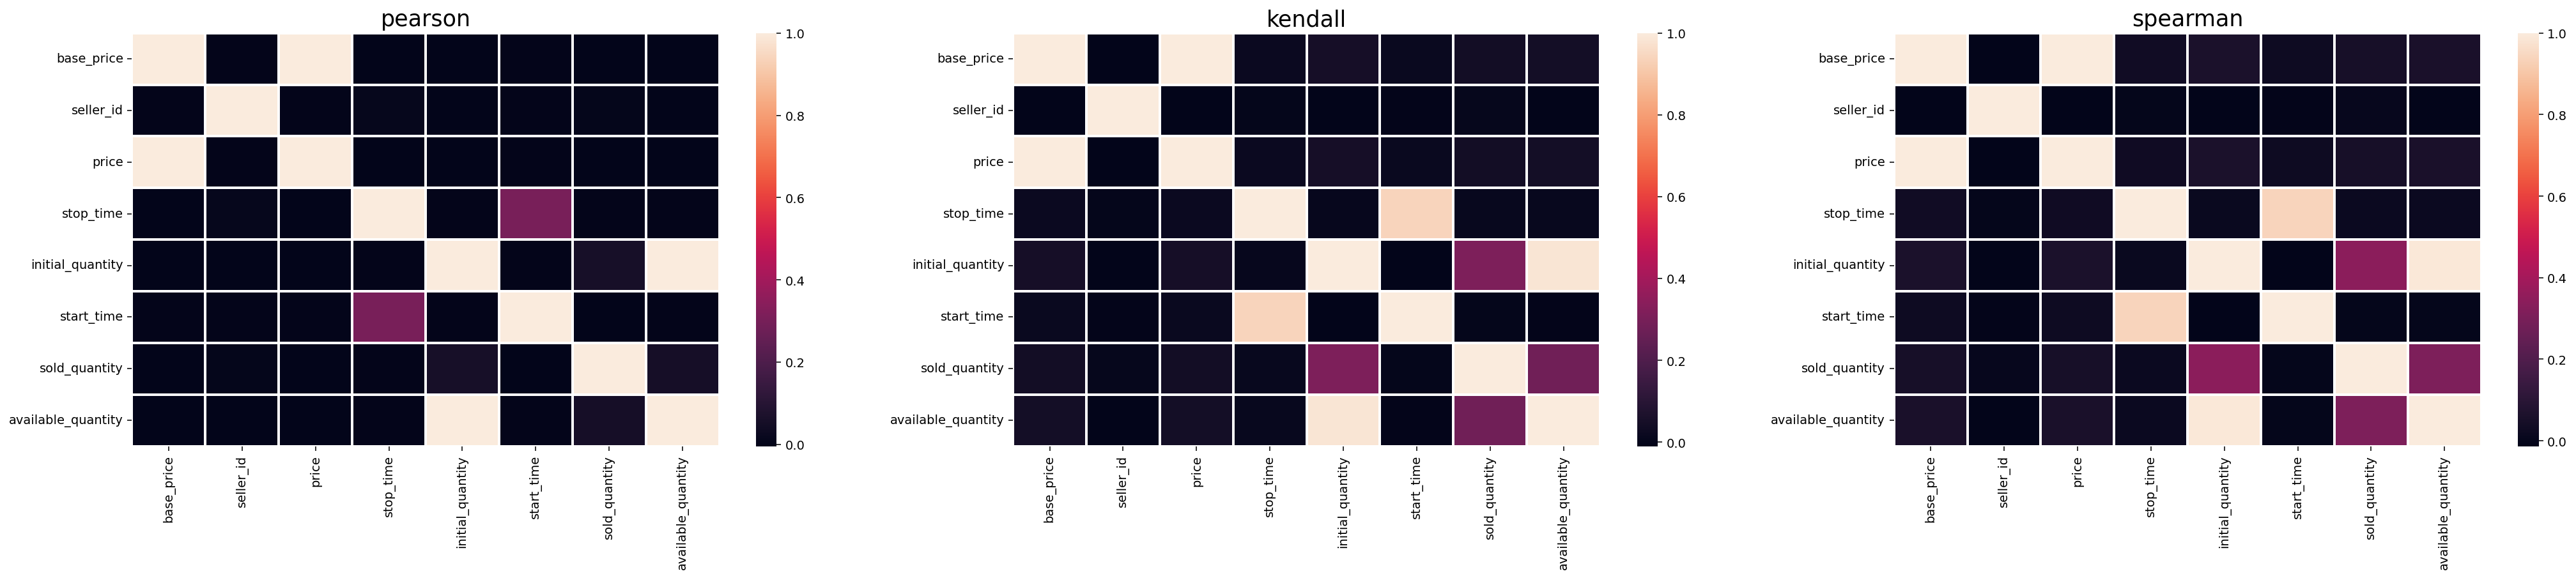

In [ ]:
# Plotting heatmap using all methods for all numeric variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = df_fixed[numeric_vars].dropna().corr(method=i)
    sns.heatmap(correlation, linewidth = 2)
    plt.title(i, fontsize=18)

In [386]:
# Based on correlation analysis, we can drop some of the highly correlated variables to reduce redundancy.
# Finding index of variables with correlation greater than 0.8

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df_fixed = df_fixed.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns due to high correlation:")
to_drop

Dropped 2 columns due to high correlation:


['price', 'available_quantity']

In [387]:
df_fixed.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   seller_address_country_name               99997 non-null   object 
 1   seller_address_country_id                 99997 non-null   object 
 2   seller_address_state_name                 99997 non-null   object 
 3   seller_address_state_id                   99997 non-null   object 
 4   seller_address_city_name                  99996 non-null   object 
 5   seller_address_city_id                    45426 non-null   object 
 6   warranty                                  39070 non-null   object 
 7   condition                                 100000 non-null  object 
 8   base_price                                100000 non-null  float64
 9   shipping_local_pick_up                    100000 non-null  bool   
 10  shipping_free_shippin

There are still many id fields to be removed.

In [388]:
to_drop = [column for column in df_fixed.columns if '_id_' in column or '_id' in column]
df_fixed = df_fixed.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} ID-related columns:")
to_drop

Dropped 9 ID-related columns:


['seller_address_country_id',
 'seller_address_state_id',
 'seller_address_city_id',
 'seller_id',
 'site_id',
 'listing_type_id',
 'parent_item_id',
 'category_id',
 'currency_id']

In [389]:
df_fixed.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   seller_address_country_name               99997 non-null   object 
 1   seller_address_state_name                 99997 non-null   object 
 2   seller_address_city_name                  99996 non-null   object 
 3   warranty                                  39070 non-null   object 
 4   condition                                 100000 non-null  object 
 5   base_price                                100000 non-null  float64
 6   shipping_local_pick_up                    100000 non-null  bool   
 7   shipping_free_shipping                    100000 non-null  bool   
 8   shipping_mode                             100000 non-null  object 
 9   buying_mode                               100000 non-null  object 
 10  tags                 

### Univariate Analysis

In [ ]:
def UVA_numeric(data, var_group):
    '''
    Univariate numeric analysis
    Takes a group of variables (INTEGER and FLOAT) and plots all the descriptives and properties along with its KDE.
    Runs a loop: calculate all the descriptives of i(th) variable and plot it
    '''
    size = len(var_group)
    plt.figure(figsize = (5,5*size), dpi = 100)

    for j,i in enumerate(var_group):
        # Calculating descriptives
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        # Calculating points of standard deviation
        points = mean-st_dev, mean+st_dev
        # Plotting the variable with every information
        ax = plt.subplot(size,1,j+1)
        
        ax.spines["top"].set(visible = False)
        ax.spines["right"].set(visible = False)
        ax.grid(True, color = "lightgrey", ls = ":")

        font = {'fontname':'sans-serif'}
        
        sns.kdeplot(x=data[i], fill=True, linewidth=2.5,alpha=0.25)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev", linewidth=4, ax=ax)
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max", s=200, ax=ax)
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean", s=200, ax=ax)
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median", s=200, ax=ax)
        plt.xlabel('{}'.format(i), fontsize = 20, **font)
        plt.ylabel('density',**font)
        plt.title(
            'within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(
                (round(points[0],2),round(points[1],2)),
                round(kurt,2),
                round(skew,2),
                (round(mini,2),round(maxi,2),round(ran,2)),
                round(mean,2),
                round(median,2)),
            **font
        )
        ax.legend(bbox_to_anchor=[1.05, 0.5],loc='center',frameon=False)
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()

In [391]:
numeric_vars = df_fixed.select_dtypes(include=np.number)[:].columns.tolist()
numeric_vars

['base_price', 'stop_time', 'initial_quantity', 'start_time', 'sold_quantity']

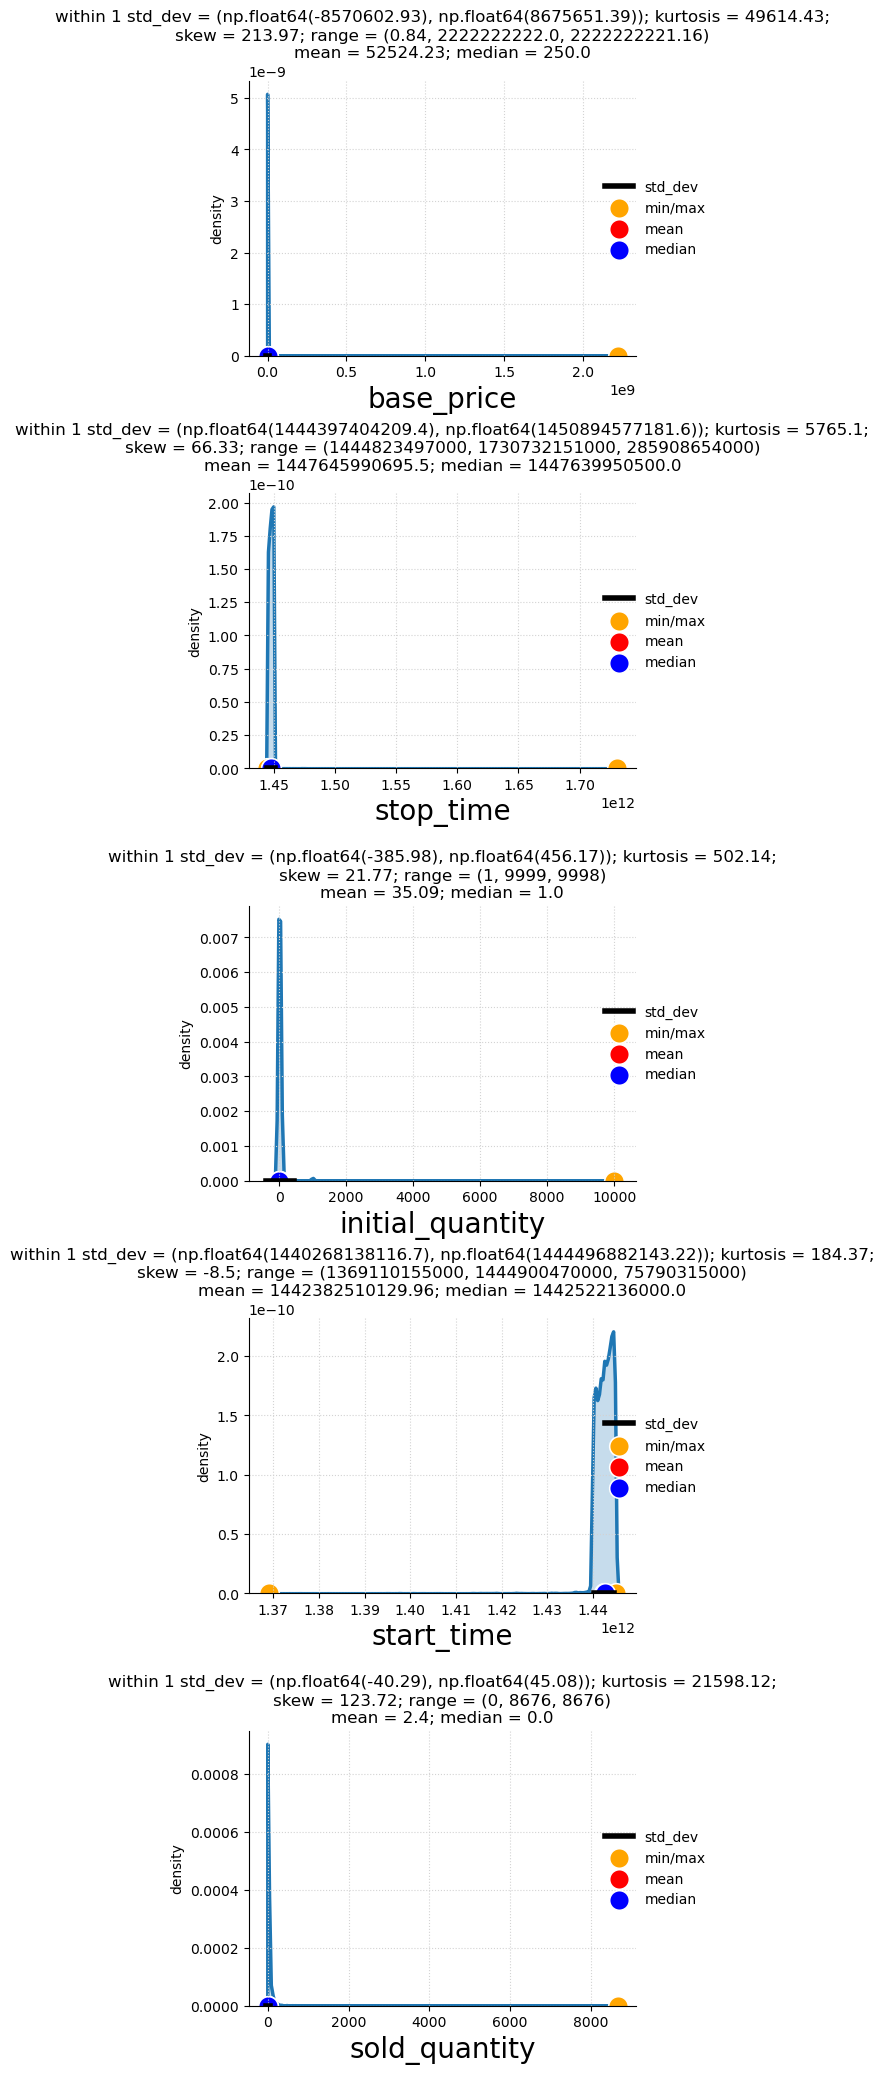

In [ ]:
UVA_numeric(df_fixed, numeric_vars)

There are some negative values and outliers to be analyzed.

In [393]:
df_fixed.describe()

,base_price,stop_time,initial_quantity,start_time,sold_quantity
count,100000.00,100000.00,100000.00,100000.00,100000.00
mean,52524.23,1447645990695.50,35.09,1442382510129.96,2.40
std,8623127.16,3248586486.10,421.08,2114372013.26,42.69
min,0.84,1444823497000.00,1.00,1369110155000.00,0.00
25%,90.00,1446311505000.00,1.00,1441141473000.00,0.00
50%,250.00,1447639950500.00,1.00,1442522136000.00,0.00
75%,800.00,1448930732250.00,2.00,1443800073750.00,0.00
max,2222222222.00,1730732151000.00,9999.00,1444900470000.00,8676.00


For start time and stop time, asuming it is the times the item was listed, new features are added.

In [394]:
# Listing duration in days
df_fixed['listing_duration_days'] = (df_fixed['stop_time'] - df_fixed['start_time']) / (1000 * 60 * 60 * 24)

# How recently was it listed
current_time = pd.Timestamp.now().timestamp() * 1000
df_fixed['days_since_listed'] = (current_time - df_fixed['start_time']) / (1000 * 60 * 60 * 24)

# Time of year
df_fixed['listing_month'] = pd.to_datetime(df_fixed['start_time'], unit='ms').dt.month
df_fixed['listing_day_of_week'] = pd.to_datetime(df_fixed['start_time'], unit='ms').dt.dayofweek

In [395]:
df_fixed[['listing_duration_days', 'days_since_listed', 'listing_month', 'listing_day_of_week']].sample()

,listing_duration_days,days_since_listed,listing_month,listing_day_of_week
34653,60.00,3763.13,9,5


In [396]:
df_fixed[['listing_duration_days', 'days_since_listed', 'listing_month', 'listing_day_of_week']].dtypes

listing_duration_days    float64
days_since_listed        float64
listing_month              int32
listing_day_of_week        int32
dtype: object

In [397]:
df_fixed[['listing_duration_days', 'days_since_listed', 'listing_month', 'listing_day_of_week']].describe()

,listing_duration_days,days_since_listed,listing_month,listing_day_of_week
count,100000.00,100000.00,100000.00,100000.00
mean,60.92,3773.66,9.03,2.58
std,38.17,24.47,0.77,1.95
min,0.40,3744.51,1.00,0.00
25%,60.00,3757.25,9.00,1.00
50%,60.00,3772.04,9.00,2.00
75%,60.00,3788.02,10.00,4.00
max,3457.05,4621.72,12.00,6.00


In [398]:
# Day of week and month are categorical variables
df_fixed['listing_month'] = df_fixed['listing_month'].astype('category')
df_fixed['listing_day_of_week'] = df_fixed['listing_day_of_week'].astype('category')

In [399]:
# Start time and stop time can be dropped after feature extraction
df_fixed = df_fixed.drop(columns=['start_time', 'stop_time'])

The base_price feature has a huge outlier, percentiles will be analyzed to drop outlier values.

In [400]:
df_fixed['base_price'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])

0.01       17.00
0.25       90.00
0.50      250.00
0.75      800.00
0.99   130000.00
Name: base_price, dtype: float64

In [401]:
df_fixed['base_price'].quantile([0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999])

0.99   130000.00
0.99   145000.00
0.99   159900.00
0.99   178007.00
0.99   199000.00
0.99   227005.00
1.00   261514.00
1.00   305009.00
1.00   419002.00
1.00   620000.00
Name: base_price, dtype: float64

In [402]:
df_fixed['base_price'].max()

2222222222.0

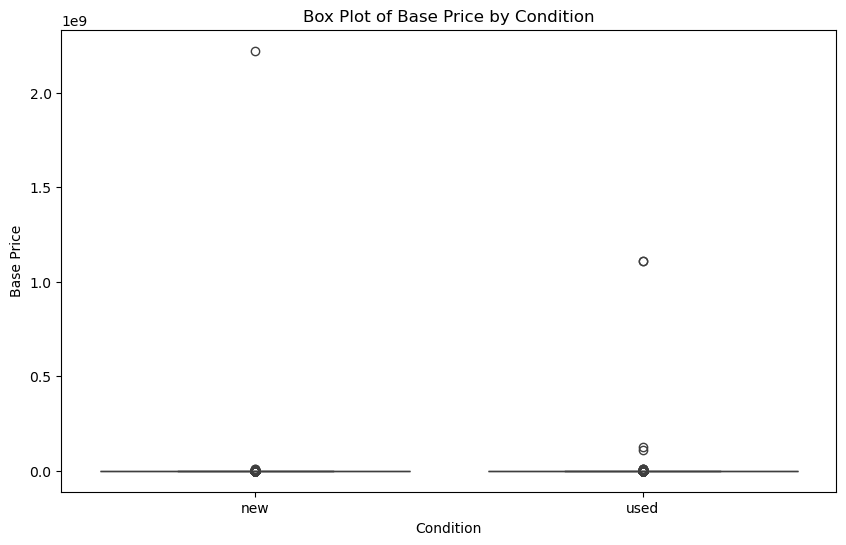

In [403]:
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(x='condition', y='base_price', data=df_fixed)
plt.title('Box Plot of Base Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Base Price')
plt.show()

Outliers for base_price are removed, we'll use the 99% percentile as a threshold. In this case it is 130,000

In [404]:
threshold = df_fixed['base_price'].quantile(0.99)
df_fixed = df_fixed[df_fixed['base_price'] <= threshold]

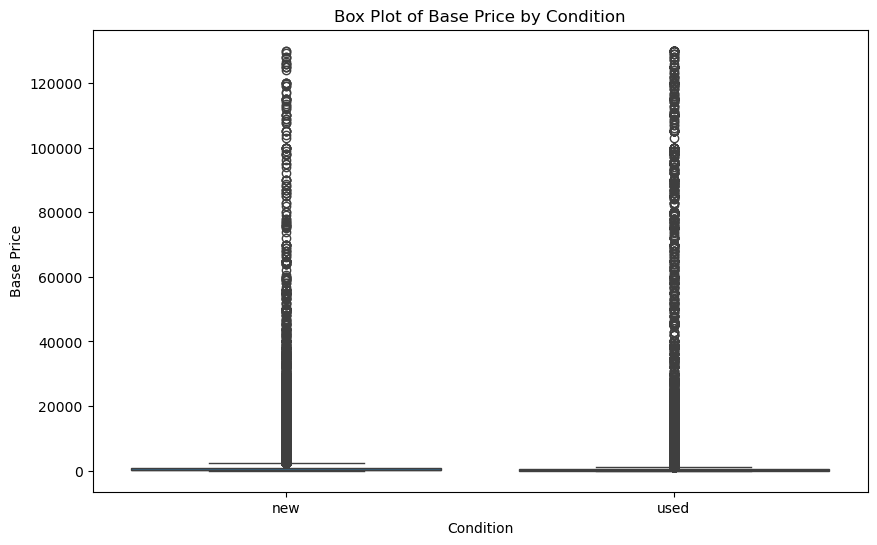

In [405]:
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(x='condition', y='base_price', data=df_fixed)
plt.title('Box Plot of Base Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Base Price')
plt.show()

In [406]:
df_fixed['base_price'].min()

0.84

In [407]:
df_fixed['base_price'].quantile([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])

0.01   16.99
0.02   24.98
0.03   29.98
0.04   30.00
0.05   35.00
0.06   39.00
0.07   40.00
0.08   40.60
0.09   45.00
0.10   49.00
Name: base_price, dtype: float64

Outliers near 0 are also removed. Percentile 1 used is 16.99

In [408]:
threshold = df_fixed['base_price'].quantile(0.01)
df_fixed = df_fixed[df_fixed['base_price'] >= threshold]

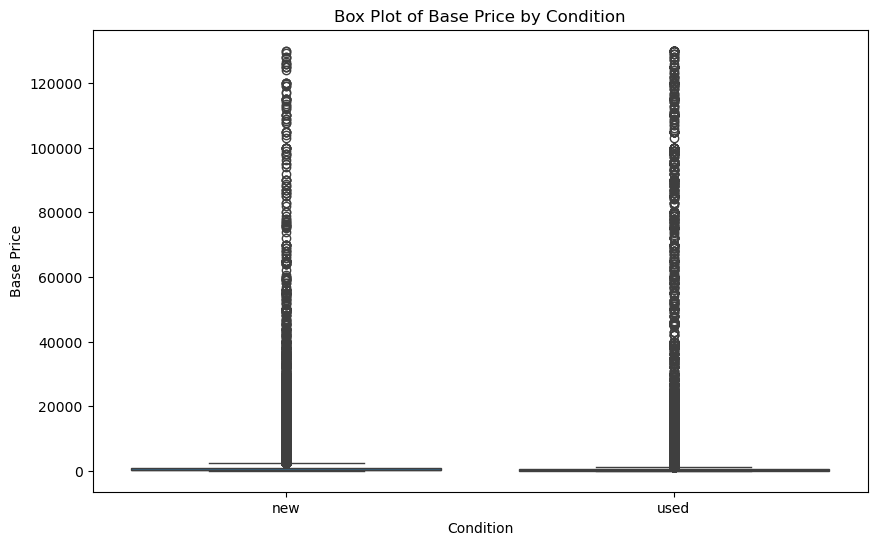

In [409]:
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(x='condition', y='base_price', data=df_fixed)
plt.title('Box Plot of Base Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Base Price')
plt.show()

In [410]:
df_fixed['sold_quantity'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])

0.01    0.00
0.25    0.00
0.50    0.00
0.75    0.00
0.99   41.00
Name: sold_quantity, dtype: float64

In [411]:
def UVA_category(data, var_group):
    '''
    Univariate Analysis categorical
    Takes a group of variables (category) and plots all the value_counts and barplot.
    '''
    for j, i in enumerate(var_group):
        plt.figure(figsize=(10, 6), dpi=100)
        norm_count = data[i].value_counts(normalize=True) * 100
        n_uni = data[i].nunique()

        # Format value counts for title
        value_counts_str = '\n'.join([f'{idx:>20} {val:>10.2f}' for idx, val in norm_count.items()])

        # Plotting the variable with every information
        sns.barplot(x=norm_count.values, y=norm_count.index, order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel(f'{i}', fontsize=20)
        plt.title(f'n_uniques = {n_uni}\nvalue counts\n{value_counts_str}')
        plt.tight_layout()
        plt.show()

In [412]:
df_fixed.select_dtypes(include=['category','object'])[:].columns, len(df_fixed.select_dtypes(include=['category','object'])[:].columns)

(Index(['seller_address_country_name', 'seller_address_state_name',
        'seller_address_city_name', 'warranty', 'condition', 'shipping_mode',
        'buying_mode', 'tags', 'descriptions', 'last_updated',
        'international_delivery_mode', 'id', 'thumbnail', 'title',
        'date_created', 'secure_thumbnail', 'status', 'permalink',
        'variations_attribute_combinations', 'listing_month',
        'listing_day_of_week'],
       dtype='object'),
 21)

From these categorical features, some fields like 'id', 'descriptions', 'thumbnail', 'secure_thumbnail', 'permalink'
 can be manually removed as they do not contain any valuable information for our target variable.

In [413]:
to_drop = ['id', 'descriptions', 'thumbnail', 'secure_thumbnail', 'permalink']
df_fixed = df_fixed.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns:")
to_drop

Dropped 5 columns:


['id', 'descriptions', 'thumbnail', 'secure_thumbnail', 'permalink']

In [414]:
df_fixed.select_dtypes(include=['category','object'])[:].columns

Index(['seller_address_country_name', 'seller_address_state_name',
       'seller_address_city_name', 'warranty', 'condition', 'shipping_mode',
       'buying_mode', 'tags', 'last_updated', 'international_delivery_mode',
       'title', 'date_created', 'status', 'variations_attribute_combinations',
       'listing_month', 'listing_day_of_week'],
      dtype='object')

Tags feature has a combination between string and list so lists will be converted to strings with ',' join

In [415]:
df_fixed['tags'].value_counts()

tags
dragged_bids_and_visits                              71906
[good_quality_thumbnail, dragged_bids_and_visits]     1320
good_quality_thumbnail                                 389
dragged_visits                                         294
[dragged_visits, free_relist]                          162
[poor_quality_thumbnail, dragged_bids_and_visits]       11
poor_quality_thumbnail                                   5
Name: count, dtype: int64

In [416]:
df_fixed['tags'] = df_fixed['tags'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else x
)

In [417]:
categorical_vars = []

for column in df_fixed.select_dtypes(include=['category','object'])[:].columns:
    try: 
        n_uniques = df_fixed[column].nunique()
        if n_uniques <= 20:
            categorical_vars.append(column)
    except Exception as e:
        print(f"Error processing column {column}: {e}")
        pass

Error processing column variations_attribute_combinations: unhashable type: 'list'


For variations_attribute_combinations, because it is a json with product attributes, a flag field is added "has_variations_combinations"

In [418]:
df_fixed['has_variations_combinations'] = df_fixed['variations_attribute_combinations'].notna().astype(bool)
df_fixed = df_fixed.drop(columns=['variations_attribute_combinations'])

In [419]:
categorical_vars.append('has_variations_combinations')
categorical_vars

['seller_address_country_name',
 'condition',
 'shipping_mode',
 'buying_mode',
 'tags',
 'international_delivery_mode',
 'status',
 'listing_month',
 'listing_day_of_week',
 'has_variations_combinations']

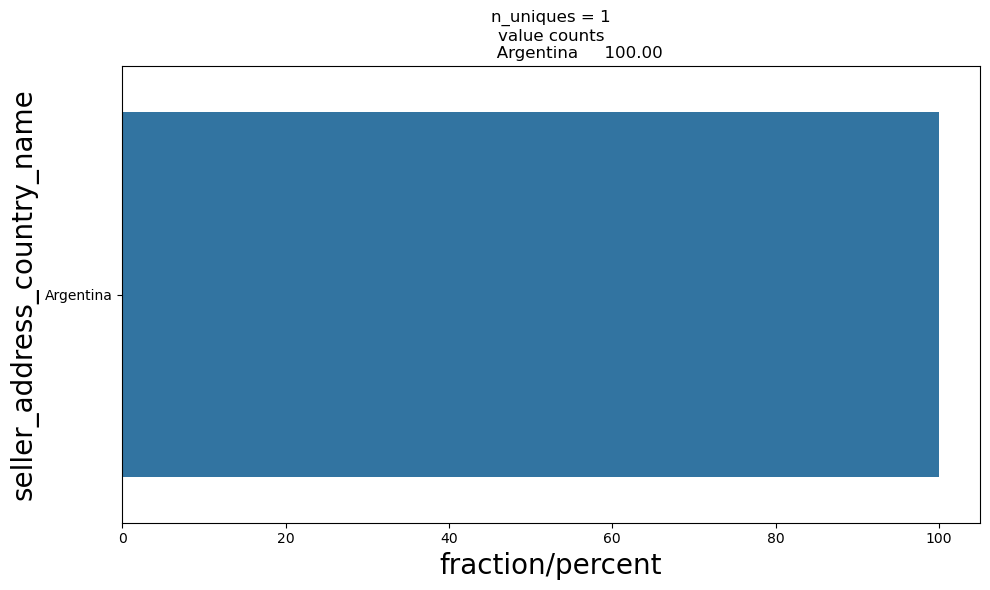

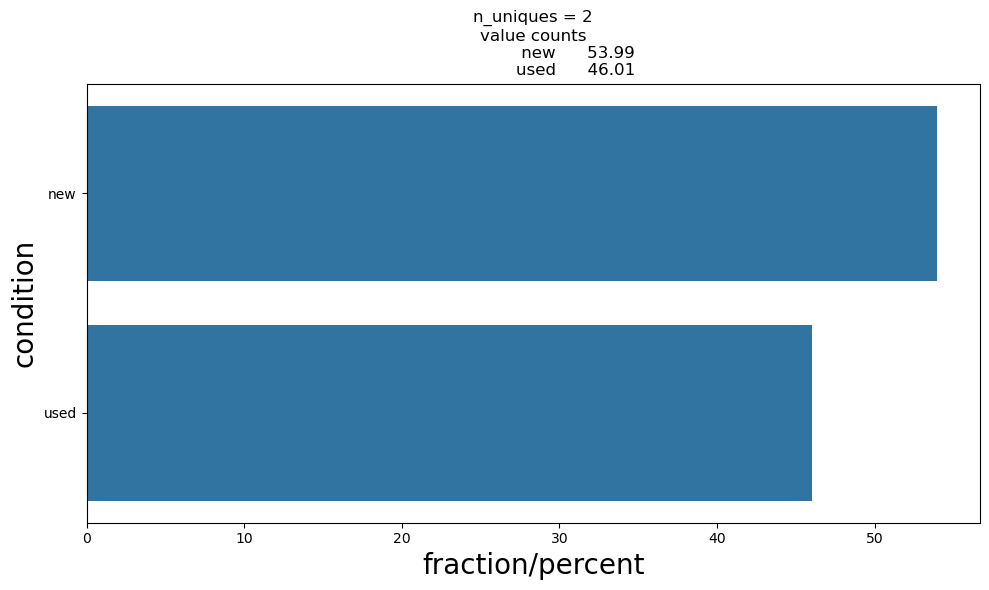

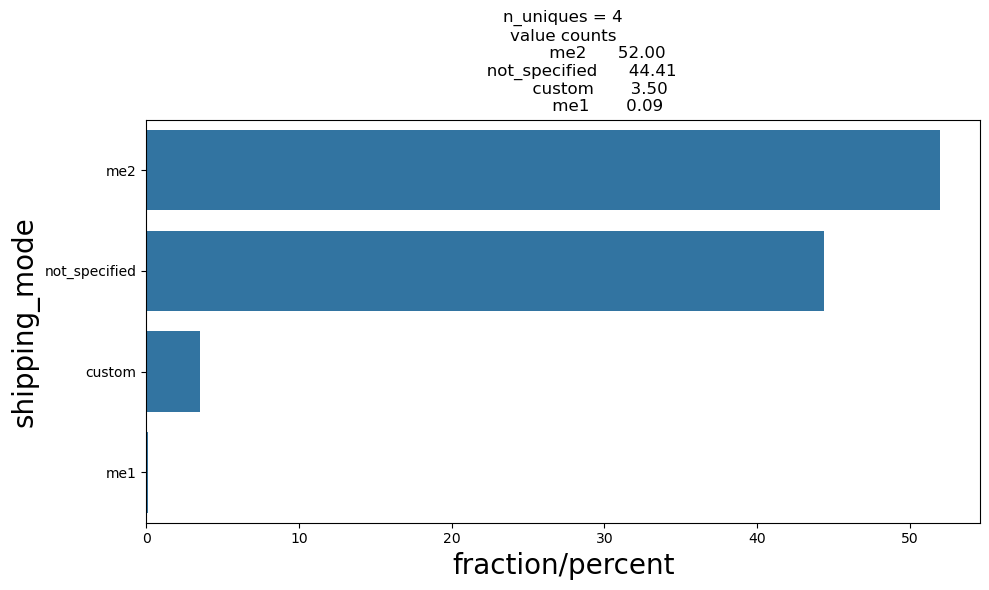

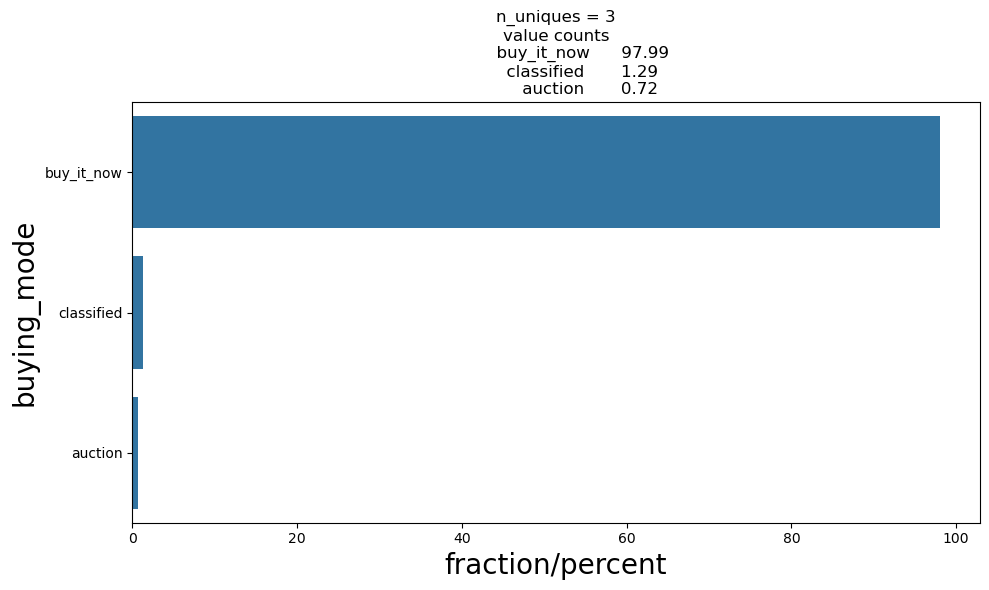

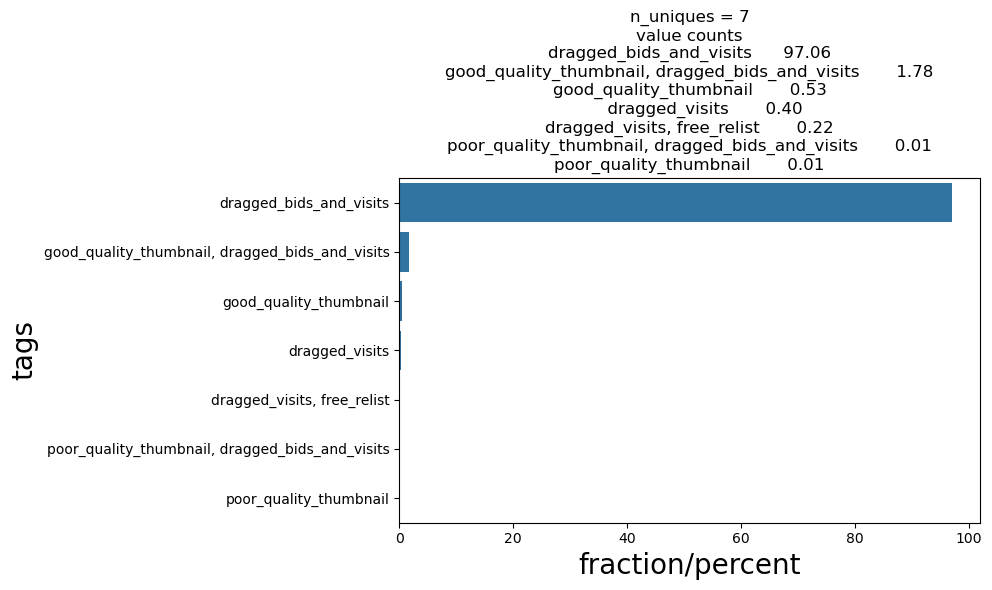

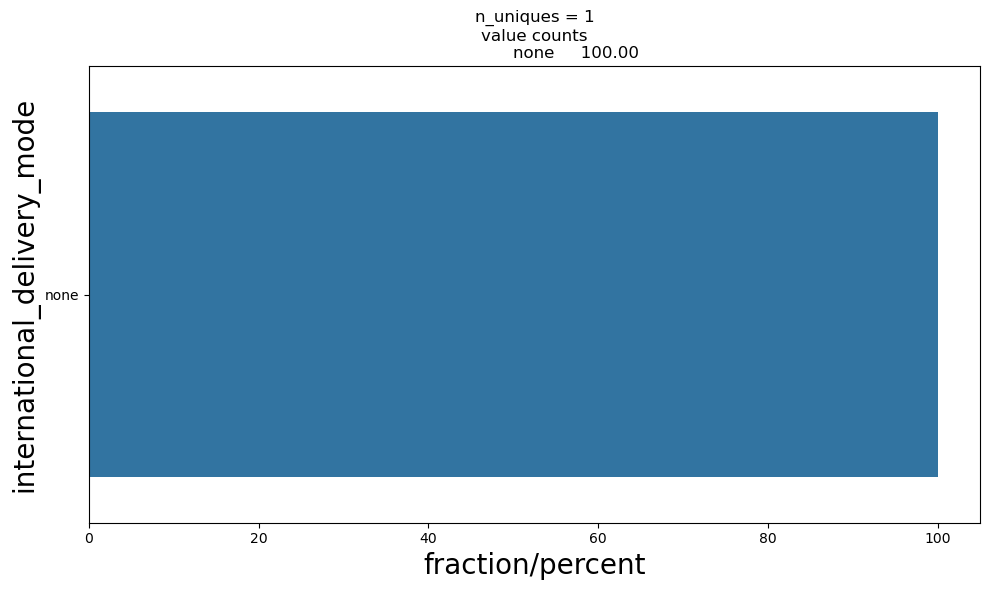

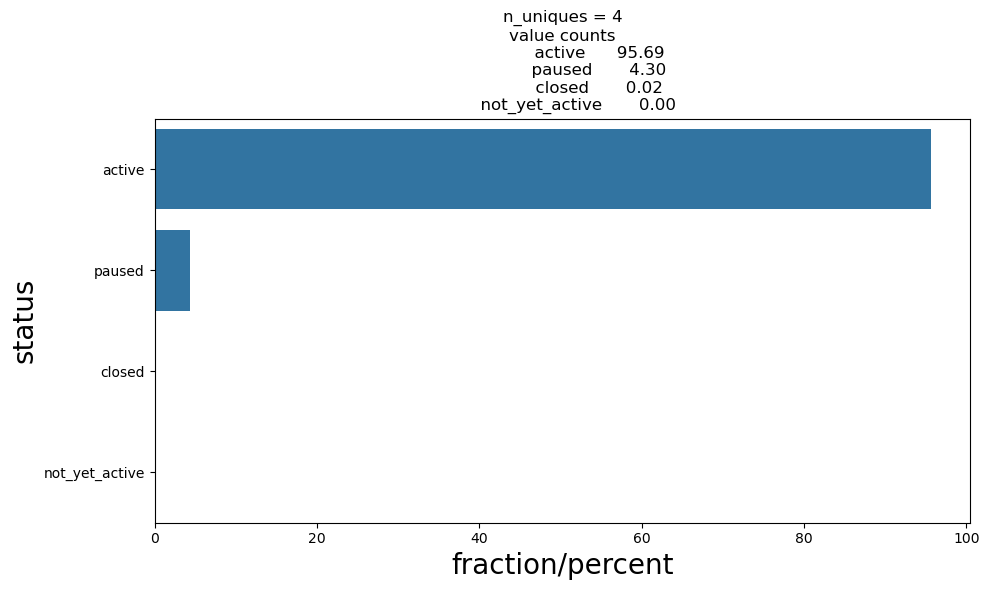

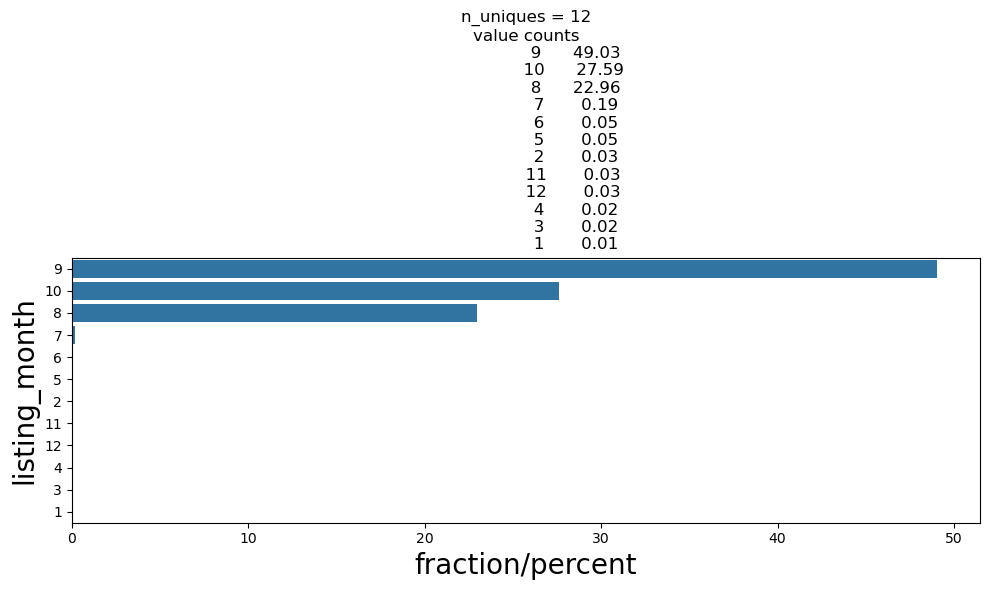

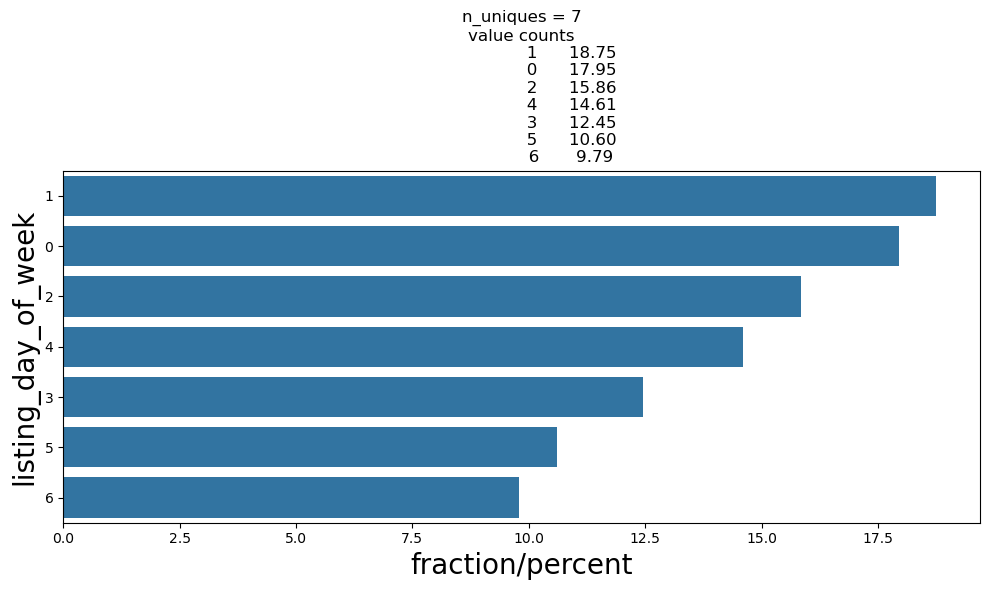

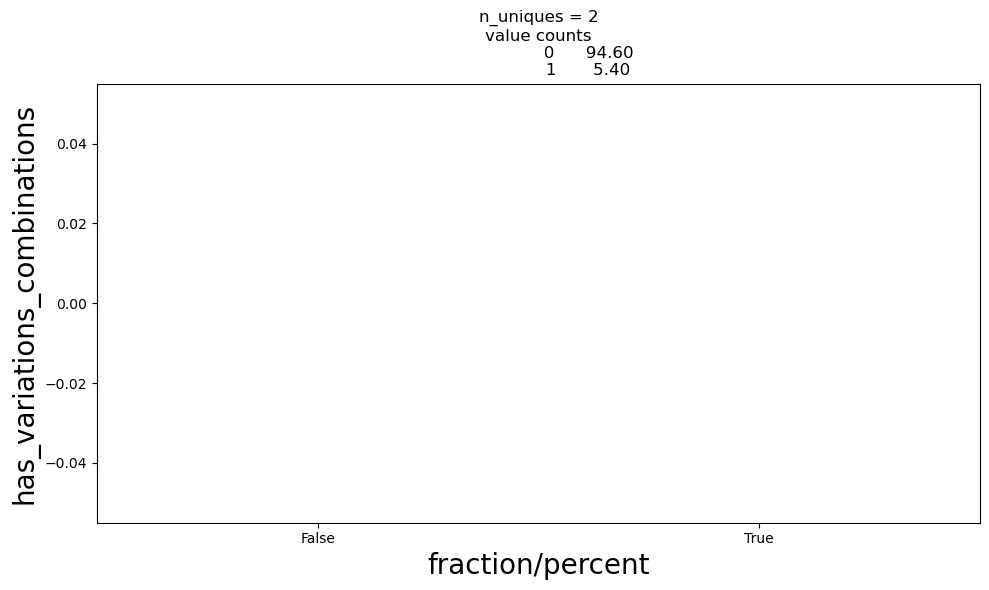

In [420]:
UVA_category(df_fixed, categorical_vars)

From these plots, 'seller_address_country_name' and 'international_delivery_mode' can be dropped as they just have one value.

In [421]:
to_drop = ['seller_address_country_name', 'international_delivery_mode']
df_fixed = df_fixed.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns:")
to_drop

Dropped 2 columns:


['seller_address_country_name', 'international_delivery_mode']

In [422]:
print(f"Final DataFrame shape: {df_fixed.shape}")
df_final = df_fixed.copy()
df_final.sample(10)

Final DataFrame shape: (98029, 29)


,seller_address_state_name,seller_address_city_name,warranty,condition,base_price,shipping_local_pick_up,shipping_free_shipping,shipping_mode,buying_mode,tags,last_updated,accepts_mercadopago,title,automatic_relist,date_created,status,initial_quantity,sold_quantity,shipping_dimensions_indicator,variations_seller_custom_field_indicator,original_price_indicator,has_non_mercado_pago_methods,has_pictures,has_warranty,listing_duration_days,days_since_listed,listing_month,listing_day_of_week,has_variations_combinations
62445,Capital Federal,Balvanera,Si,new,100.00,True,False,me2,buy_it_now,dragged_bids_and_visits,2015-09-17T18:42:21.000Z,True,Una Tumba Para Los Romanov - Alzogaray - Siglo...,False,2015-09-17T18:42:19.000Z,active,1,0,False,False,False,False,False,True,60.00,3772.12,9,3,False
8591,Buenos Aires,Morón,NaN,used,8000.00,True,False,not_specified,buy_it_now,dragged_bids_and_visits,2015-10-14T22:25:26.000Z,True,Tanque De Acero Inox Calefaccionado De 230 L.,False,2015-10-14T22:25:24.000Z,active,1,0,False,False,False,True,True,False,60.00,3744.96,10,2,False
91218,Buenos Aires,La Plata,"Todas las monedas que subasto son originales, ...",used,25.00,True,False,custom,buy_it_now,dragged_bids_and_visits,2015-09-29T13:47:42.000Z,True,Spg - Mozambique Portugues 1 Escudo 1965.,False,2015-09-29T13:47:38.000Z,active,1,0,False,False,False,False,True,True,60.00,3760.32,9,1,False
46958,Buenos Aires,gral san martin,100 % Artesanal,new,38.00,True,False,not_specified,buy_it_now,"good_quality_thumbnail, dragged_bids_and_visits",2015-09-17T20:12:47.000Z,True,Titeres Artesanales Ideal Souvenirs,False,2015-09-11T19:42:25.000Z,active,27,31,False,False,False,False,True,True,60.00,3778.08,9,4,False
98402,Capital Federal,Villa del Parque,NaN,new,275.00,True,False,not_specified,buy_it_now,dragged_bids_and_visits,2015-09-19T05:27:08.000Z,True,Moto De Competicion A Escala Yamaha Yzr Ow98 5...,False,2015-09-19T05:27:05.000Z,active,1,1,False,False,False,True,True,False,60.00,3770.67,9,5,False
22675,Capital Federal,Mataderos,Resortes estandar delanteros y traseros dos añ...,new,1016.94,True,False,me2,buy_it_now,NaN,2015-09-11T11:34:25.000Z,True,Car-jgo Espirales Delanteros Honda Cvrx Mod.1991,False,2015-08-17T09:14:03.000Z,active,10,0,False,False,False,False,True,True,60.00,3803.51,8,0,False
1307,Capital Federal,Belgrano,"Las fotos corresponden al ejemplar publicado, ...",used,50.00,True,False,me2,buy_it_now,dragged_bids_and_visits,2015-08-24T13:46:56.000Z,True,La Hoja Voladora _ Jose Pedroni - Eudeba,False,2015-08-24T13:24:38.000Z,active,1,0,False,False,False,False,False,True,60.00,3796.34,8,0,False
99890,Buenos Aires,Luján,NaN,used,370.00,True,False,me2,buy_it_now,NaN,2015-09-08T04:43:19.000Z,True,"Ruben Dario, Cantos De Vida Y Esperanza. Ed. M...",False,2015-09-08T04:43:17.000Z,active,1,0,False,False,False,False,True,False,60.00,3781.70,9,1,False
77200,Buenos Aires,Bragado,Oferta con confianza - Revisa nuestras Calific...,used,44.00,False,False,me2,buy_it_now,dragged_bids_and_visits,2015-10-06T04:51:57.000Z,True,Racing Campeonato 1956 Lamina Poster Original ...,False,2015-10-06T04:51:56.000Z,active,1,0,False,False,False,False,False,True,60.00,3753.70,10,1,False
13540,Capital Federal,San Nicolás,MIS CALIFICACIONES,used,165.00,False,False,not_specified,buy_it_now,dragged_bids_and_visits,2015-09-10T03:31:54.000Z,True,Gitano En Ambar Martin Cruz Smith - Muy Buen E...,False,2015-08-18T11:55:07.000Z,active,1,0,False,False,False,False,False,True,60.00,3802.40,8,1,False


As a final step, numeric features are scaled between [-1, 1] interval.

In [423]:
numeric_vars = df_final.select_dtypes(include=np.number).columns.tolist()
numeric_vars

['base_price',
 'initial_quantity',
 'sold_quantity',
 'listing_duration_days',
 'days_since_listed']

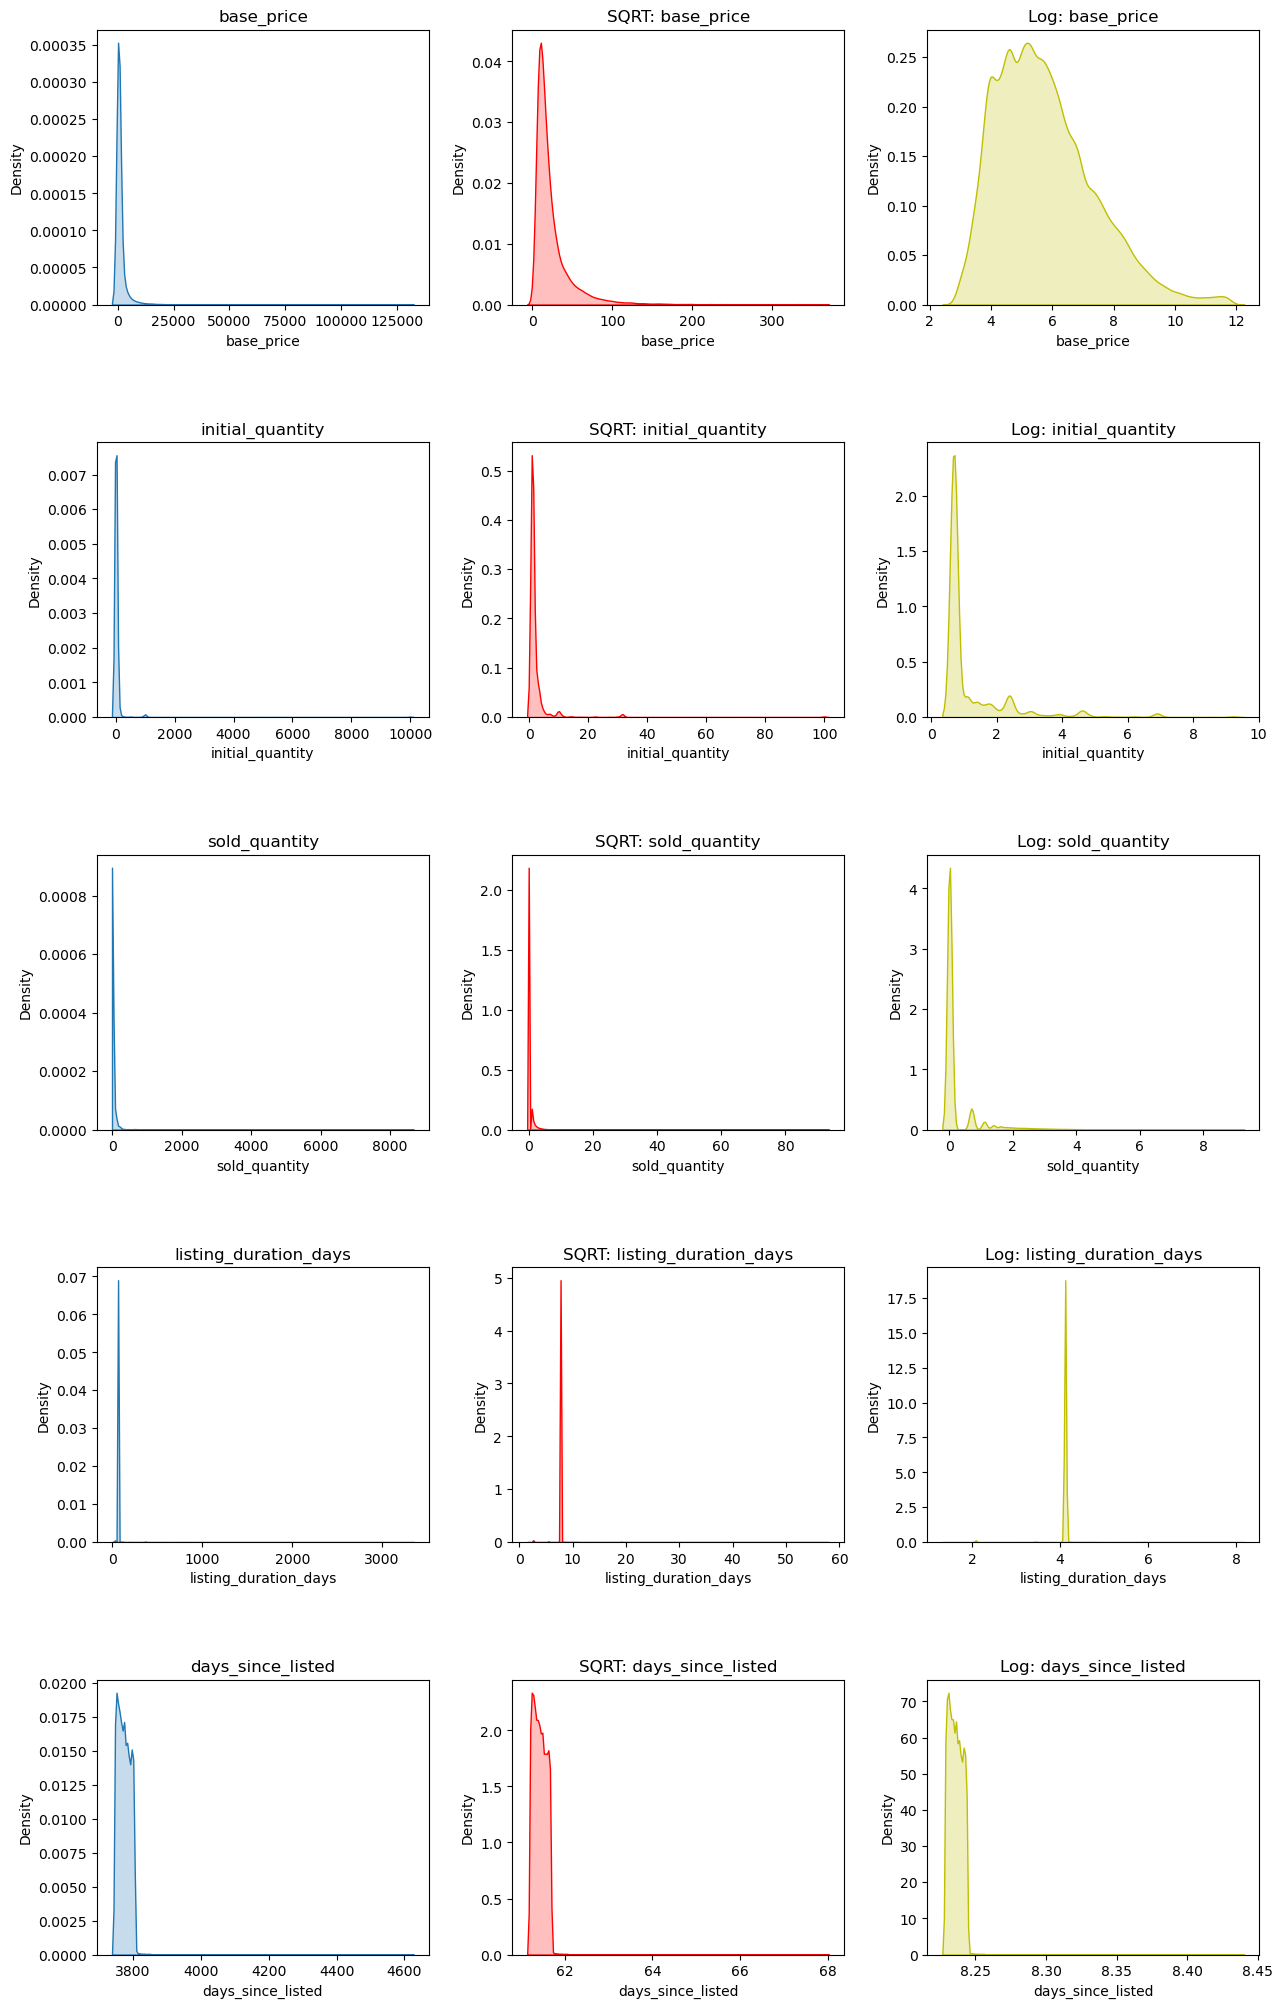

In [ ]:
fig, ax = plt.subplots(len(numeric_vars),3,figsize=(15,25))
for i, num in enumerate(numeric_vars):
    temp = df_final[num].copy()
    sns.kdeplot(data=temp,fill=True,ax=ax[i,0])
    ax[i,0].set_title(num)

    sqrt_temp = np.sqrt(temp)
    sns.kdeplot(data=sqrt_temp,fill=True,color='r',ax=ax[i,1])
    ax[i,1].set_title(f"SQRT: {num}")
    
    log_temp = np.log1p(temp)
    sns.kdeplot(data=log_temp,fill=True,color='y',ax=ax[i,2])
    ax[i,2].set_title(f"Log: {num}")
plt.subplots_adjust(hspace=0.5,wspace=0.25)
plt.show()

Listing_duration_days variable seems odd because of the peak. It looks like it can be switched to a categorical feature

In [426]:
df_final['listing_duration_days'].describe()

count   98029.00
mean       60.50
std        24.29
min         3.00
25%        60.00
50%        60.00
75%        60.00
max      3345.86
Name: listing_duration_days, dtype: float64

In [427]:
# Create binary feature
df_final['is_60day_listing'] = (df_final['listing_duration_days'] == 60.0).astype(bool)
df_final = df_final.drop('listing_duration_days', axis=1)

For sold_quantity, a similar spike is observed. A new feature is added to indicate if it a product has any sold items.

In [428]:
df_final['has_sold_quantity'] = (df_final['sold_quantity'] > 0).astype(bool)

Now based on the charts, numeric values should look like normal curves. The following transformations are applied:
- base_price: log transformation
- initial_quantity: log transformation
- sold_quantity: log transformation
- days_since_listed: SQRT transformation

In [429]:
apply_log = ['base_price', 'initial_quantity', 'sold_quantity']

for col in apply_log:
    df_final[col] = np.log1p(df_final[col])

df_final['days_since_listed'] = np.sqrt(df_final['days_since_listed'])

In [430]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['base_price', 'initial_quantity', 'sold_quantity', 'days_since_listed']
df_final[features_to_scale] = scaler.fit_transform(df_final[features_to_scale])

In [431]:
df_final.describe()

,base_price,initial_quantity,sold_quantity,days_since_listed
count,98029.00,98029.00,98029.00,98029.00
mean,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.79,-0.46,-0.36,-1.31
25%,-0.74,-0.46,-0.36,-0.73
50%,-0.14,-0.46,-0.36,-0.06
75%,0.59,-0.11,-0.36,0.66
max,3.78,6.89,11.83,36.41


In [432]:
print(f"Final DataFrame shape after transformations: {df_final.shape}")
df_final.sample(5)

Final DataFrame shape after transformations: (98029, 30)


,seller_address_state_name,seller_address_city_name,warranty,condition,base_price,shipping_local_pick_up,shipping_free_shipping,shipping_mode,buying_mode,tags,last_updated,accepts_mercadopago,title,automatic_relist,date_created,status,initial_quantity,sold_quantity,shipping_dimensions_indicator,variations_seller_custom_field_indicator,original_price_indicator,has_non_mercado_pago_methods,has_pictures,has_warranty,days_since_listed,listing_month,listing_day_of_week,has_variations_combinations,is_60day_listing,has_sold_quantity
10095,Buenos Aires,madero tapiales,Sí,new,0.28,False,False,not_specified,buy_it_now,dragged_bids_and_visits,2015-10-05T16:39:41.000Z,True,Espiral / Resorte Rally Chevrolet 400,False,2015-09-17T15:07:51.000Z,active,-0.11,-0.36,False,False,False,False,False,True,-0.05,9,3,False,True,False
9880,Capital Federal,Caballito,Garantia del fabricante por fallas o defectos ...,new,-0.03,True,False,me2,buy_it_now,dragged_bids_and_visits,2015-09-22T10:22:30.000Z,True,Termostato Original Gm Onix Prisma Spin Cobalt,True,2015-09-22T10:22:29.000Z,active,-0.46,-0.36,False,False,False,False,True,True,-0.27,9,1,False,True,False
40719,Capital Federal,Caballito,NaN,used,0.15,True,False,me2,buy_it_now,NaN,2015-10-09T18:17:23.000Z,True,Jorge Baron Biza - El Desierto Y La Semilla - ...,False,2015-10-09T18:17:07.000Z,active,-0.46,-0.36,False,False,False,False,False,False,-1.05,10,4,False,False,False
28375,Capital Federal,Palermo,NaN,used,1.99,False,False,not_specified,classified,NaN,2015-10-06T19:43:01.000Z,False,Departamento En Alquiler Por Temporada De 2 Am...,False,2015-10-06T19:42:48.000Z,active,-0.46,-0.36,False,False,False,False,True,False,-0.92,10,1,False,False,False
24476,Capital Federal,CABA,Sin garantía,used,-1.14,True,False,custom,buy_it_now,dragged_bids_and_visits,2015-09-27T09:10:37.000Z,True,De Buenos Aires Al Gran Chaco. Jules Huret [vi...,False,2015-09-27T09:10:37.000Z,active,-0.46,0.57,False,False,False,False,False,True,-0.49,9,6,False,True,True


In [454]:
print("Final features:")
df_final.columns.tolist()

Final features:


['seller_address_state_name',
 'seller_address_city_name',
 'warranty',
 'condition',
 'base_price',
 'shipping_local_pick_up',
 'shipping_free_shipping',
 'shipping_mode',
 'buying_mode',
 'tags',
 'last_updated',
 'accepts_mercadopago',
 'title',
 'automatic_relist',
 'date_created',
 'status',
 'initial_quantity',
 'sold_quantity',
 'shipping_dimensions_indicator',
 'variations_seller_custom_field_indicator',
 'original_price_indicator',
 'has_non_mercado_pago_methods',
 'has_pictures',
 'has_warranty',
 'days_since_listed',
 'listing_month',
 'listing_day_of_week',
 'has_variations_combinations',
 'is_60day_listing',
 'has_sold_quantity']

## 3. Pre-modelling Checks

### Naive Classifier

Only using numeric features

In [433]:
from sklearn.model_selection import train_test_split

In [434]:
target = df_final['condition'].copy()

In [435]:
numeric_vars = df_final.select_dtypes(include=np.number).columns.tolist()
df_naive = df_final[numeric_vars].copy()
df_naive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98029 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   base_price         98029 non-null  float64
 1   initial_quantity   98029 non-null  float64
 2   sold_quantity      98029 non-null  float64
 3   days_since_listed  98029 non-null  float64
dtypes: float64(4)
memory usage: 3.7 MB


In [436]:
y = target.copy()
X = df_naive.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1999, stratify=y)

print("train data size:", X_train.shape)
print("test data size:", X_test.shape)

train data size: (78423, 4)
test data size: (19606, 4)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression as logreg

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
predict_test = rf.predict(X_test)

In [446]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
predict_test_encoded = le.transform(predict_test)

acc = accuracy_score(y_test_encoded, predict_test_encoded)
print('Accuracy =', acc)

precision = precision_score(y_test_encoded, predict_test_encoded)
print('Precision =', precision)

recall = recall_score(y_test_encoded, predict_test_encoded)
print('Recall =', recall)

auc_score = roc_auc_score(y_test_encoded, predict_test_encoded)
print('AUC =', auc_score)

Accuracy = 0.7540038763643783
Precision = 0.733044733044733
Recall = 0.7319884726224783
AUC = 0.7523793459106345


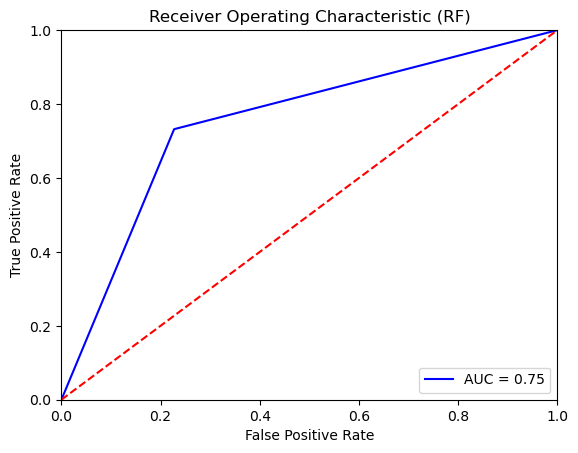

In [448]:
fpr, tpr, threshold = metrics.roc_curve(y_test_encoded, predict_test_encoded)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (RF)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [449]:
classification_report_score = classification_report(y_test_encoded, predict_test_encoded)
print(classification_report_score)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     10584
           1       0.73      0.73      0.73      9022

    accuracy                           0.75     19606
   macro avg       0.75      0.75      0.75     19606
weighted avg       0.75      0.75      0.75     19606



In [450]:
log_model = logreg()

log_model.fit(X_train, y_train)
predict_test = log_model.predict(X_test)

In [451]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
predict_test_encoded = le.transform(predict_test)

acc = accuracy_score(y_test_encoded, predict_test_encoded)
print('Accuracy =', acc)

precision = precision_score(y_test_encoded, predict_test_encoded)
print('Precision =', precision)

recall = recall_score(y_test_encoded, predict_test_encoded)
print('Recall =', recall)

auc_score = roc_auc_score(y_test_encoded, predict_test_encoded)
print('AUC =', auc_score)

Accuracy = 0.7545139243088851
Precision = 0.6809699888210509
Recall = 0.8777432941698071
AUC = 0.7636070968203533


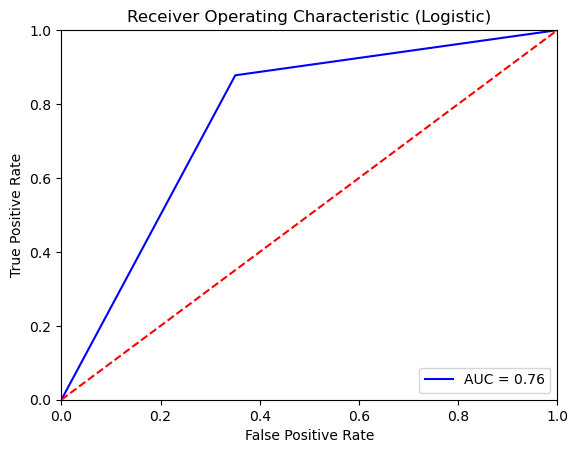

In [452]:
fpr, tpr, threshold = metrics.roc_curve(y_test_encoded, predict_test_encoded)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (Logistic)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
classification_report_score = classification_report(y_test, predict_test)   
print(classification_report_score)

              precision    recall  f1-score   support

           0       0.86      0.65      0.74     10584
           1       0.68      0.88      0.77      9022

    accuracy                           0.75     19606
   macro avg       0.77      0.76      0.75     19606
weighted avg       0.78      0.75      0.75     19606



### CatBoost Modelling

In [456]:
from fast_ml.model_development import train_valid_test_split

X_train_CB, y_train_CB, X_valid_CB, y_valid_CB, X_test_CB, y_test_CB = train_valid_test_split(
    df_final, 
    target = 'condition', 
    train_size=0.8,
    valid_size=0.1,
    test_size=0.1,
    random_state=42
)

In [458]:
categorical_features = X_train_CB.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()
categorical_features

['seller_address_state_name',
 'seller_address_city_name',
 'warranty',
 'shipping_local_pick_up',
 'shipping_free_shipping',
 'shipping_mode',
 'buying_mode',
 'tags',
 'last_updated',
 'accepts_mercadopago',
 'title',
 'automatic_relist',
 'date_created',
 'status',
 'shipping_dimensions_indicator',
 'variations_seller_custom_field_indicator',
 'original_price_indicator',
 'has_non_mercado_pago_methods',
 'has_pictures',
 'has_warranty',
 'listing_month',
 'listing_day_of_week',
 'has_variations_combinations',
 'is_60day_listing',
 'has_sold_quantity']

In [459]:
from catboost import CatBoostClassifier,Pool

model_CB_1 = CatBoostClassifier(random_state=42, od_type = "Iter", od_wait=100, cat_features=categorical_features)

In [461]:
# Convert categorical features to string type, which converts NaN to 'nan'
for col in categorical_features:
    X_train_CB[col] = X_train_CB[col].astype(str)
    X_valid_CB[col] = X_valid_CB[col].astype(str)
    X_test_CB[col] = X_test_CB[col].astype(str)

model_CB_1.fit(X_train_CB, y_train_CB, cat_features=categorical_features, eval_set=(X_valid_CB, y_valid_CB), silent=True)

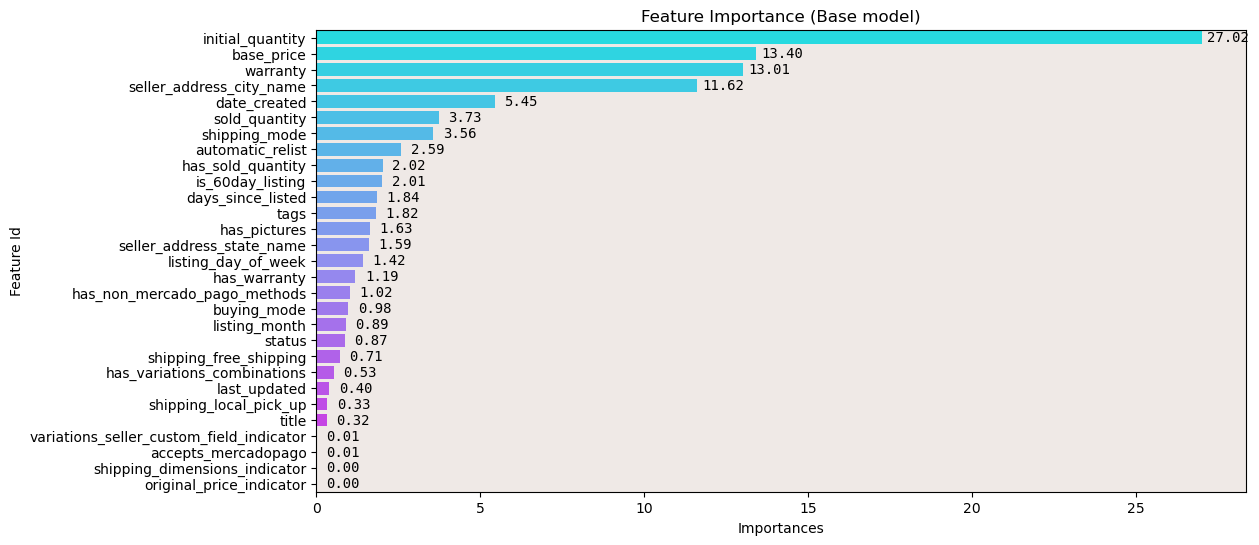

In [462]:
# Create a dataframe of feature importance 
model_cat_feature_importance = pd.DataFrame(model_CB_1.get_feature_importance(prettified=True))

# Plotting feature importance
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111, facecolor = "#EFE9E6")
feature_plot=sns.barplot(x="Importances", y="Feature Id", data=model_cat_feature_importance, palette="cool", ax=ax)
for index, x in enumerate(model_cat_feature_importance['Importances']):
    ax.text(x = x+0.8, y = index, fontfamily='monospace', s = f"{x:.2f}",color = "k",ha = "center",va = "center",)
plt.title('Feature Importance (Base model)')
plt.show()

In [463]:
valid_data_CB = Pool(data=X_valid_CB, label=y_valid_CB, cat_features=categorical_features)

In [464]:
predict_valid_CB = model_CB_1.predict(valid_data_CB)

In [465]:
# Encode the target variable
le = LabelEncoder()
y_train_encoded_CB = le.fit_transform(y_train_CB)
y_valid_encoded_CB = le.transform(y_valid_CB)
predict_valid_encoded_CB = le.transform(predict_valid_CB)

acc = accuracy_score(y_valid_encoded_CB, predict_valid_encoded_CB)
print('Accuracy =', acc)

precision = precision_score(y_valid_encoded_CB, predict_valid_encoded_CB)
print('Precision =', precision)

recall = recall_score(y_valid_encoded_CB, predict_valid_encoded_CB)
print('Recall =', recall)

auc_score = roc_auc_score(y_valid_encoded_CB, predict_valid_encoded_CB)
print('AUC =', auc_score)

Accuracy = 0.8536162399265531
Precision = 0.81049271893078
Recall = 0.8933597185576078
AUC = 0.8562897546165775


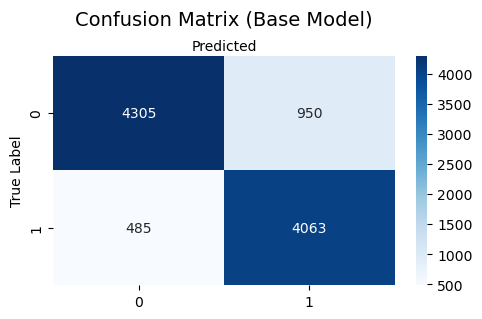

In [ ]:
cm = pd.crosstab(y_valid_CB, predict_valid_CB, rownames=['True Label'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,3))

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')

ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix (Base Model)', y=1.1,fontsize=14)
plt.show()

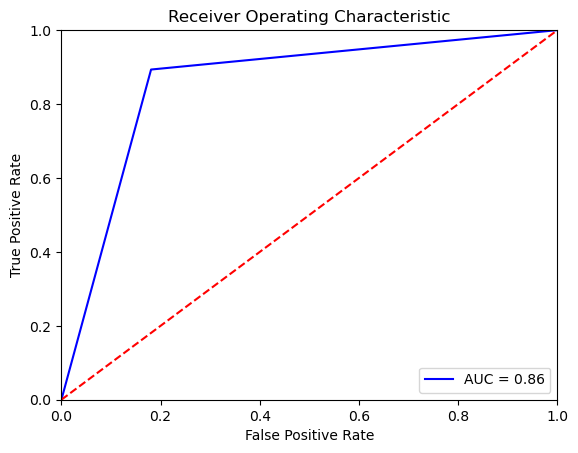

In [467]:
fpr, tpr, threshold = metrics.roc_curve(y_valid_encoded_CB, predict_valid_encoded_CB)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
classification_report_score = classification_report(y_valid_CB, predict_valid_CB)
print(classification_report_score)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5255
           1       0.81      0.89      0.85      4548

    accuracy                           0.85      9803
   macro avg       0.85      0.86      0.85      9803
weighted avg       0.86      0.85      0.85      9803



#### Random Search Grid for Model Params

In [ ]:
grid = {
    'iterations': [100, 500, 1000, 2000],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'l2_leaf_reg': [1, 2, 3, 4, 5, 10, 100]
}

In [470]:
model_CB_search = CatBoostClassifier(random_state=42, od_type="Iter", od_wait=100, cat_features=categorical_features)

In [471]:
randomized_search_results = model_CB_search.randomized_search(
    grid,
    X=X_train_CB,
    y=y_train_CB,
    plot=False
)

0:	learn: 0.6925827	test: 0.6925831	best: 0.6925831 (0)	total: 288ms	remaining: 4m 48s
1:	learn: 0.6920135	test: 0.6920138	best: 0.6920138 (1)	total: 400ms	remaining: 3m 19s
2:	learn: 0.6914503	test: 0.6914512	best: 0.6914512 (2)	total: 662ms	remaining: 3m 39s
3:	learn: 0.6908825	test: 0.6908843	best: 0.6908843 (3)	total: 813ms	remaining: 3m 22s
4:	learn: 0.6903248	test: 0.6903266	best: 0.6903266 (4)	total: 848ms	remaining: 2m 48s
5:	learn: 0.6897781	test: 0.6897800	best: 0.6897800 (5)	total: 888ms	remaining: 2m 27s
6:	learn: 0.6892128	test: 0.6892149	best: 0.6892149 (6)	total: 920ms	remaining: 2m 10s
7:	learn: 0.6886498	test: 0.6886523	best: 0.6886523 (7)	total: 948ms	remaining: 1m 57s
8:	learn: 0.6880968	test: 0.6880996	best: 0.6880996 (8)	total: 993ms	remaining: 1m 49s
9:	learn: 0.6875390	test: 0.6875417	best: 0.6875417 (9)	total: 1.04s	remaining: 1m 43s
10:	learn: 0.6869832	test: 0.6869870	best: 0.6869870 (10)	total: 1.07s	remaining: 1m 36s
11:	learn: 0.6864355	test: 0.6864394	best

In [472]:
# Results from Random Search for CatBoost Regressor
print("\n==================================")
print(" Results from Random Search ")
print("==================================")
print("\n The best parameters across ALL searched params:", randomized_search_results['params'])


 Results from Random Search 

 The best parameters across ALL searched params: {'depth': 5, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 1000}


In [474]:
# create the object of the model
model_CB_best = CatBoostClassifier(
    iterations = randomized_search_results['params']['iterations'],
    learning_rate = randomized_search_results['params']['learning_rate'],
    random_state = 42,
    od_type = "Iter",
    od_wait = 100,
    l2_leaf_reg = randomized_search_results['params']['l2_leaf_reg'],
)

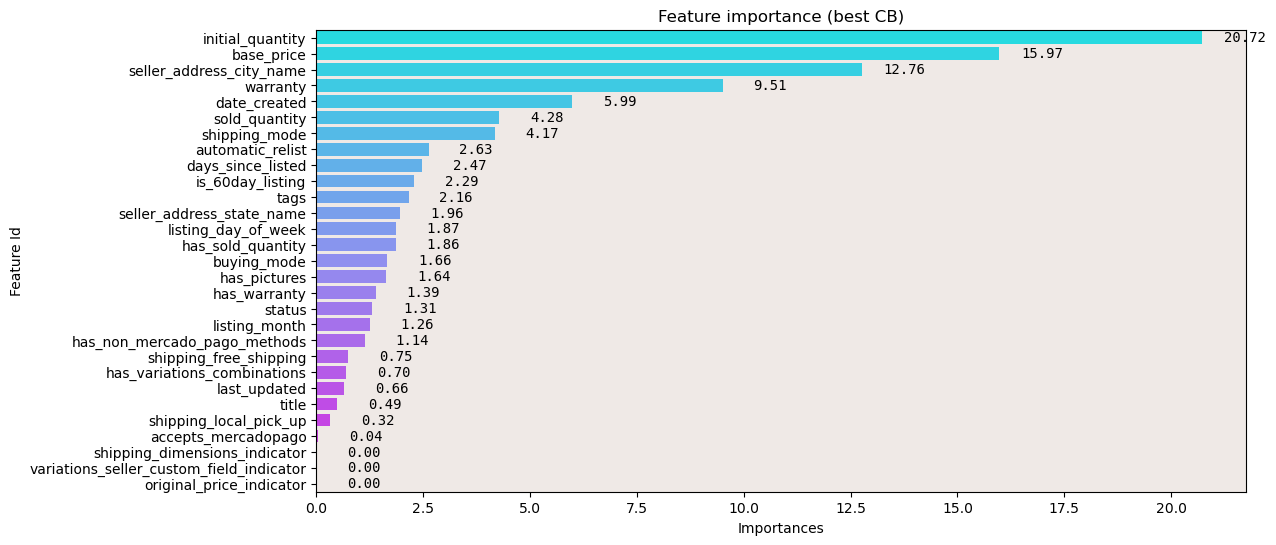

In [475]:
# Fit model 
model_CB_best.fit(X_train_CB, y_train_CB, cat_features=categorical_features, eval_set=(X_valid_CB, y_valid_CB), silent=True)

# Create a dataframe of feature importance 
model_CB_feature_importance = pd.DataFrame(model_CB_best.get_feature_importance(prettified=True))
# Plotting feature importance
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111, facecolor = "#EFE9E6")
feature_plot= sns.barplot(x="Importances", y="Feature Id", data = model_CB_feature_importance, palette = "cool", ax=ax)
for index, x in enumerate(model_CB_feature_importance['Importances']):
    ax.text(x = x+1.5, y = index, fontfamily='monospace', s = f"{x:.2f}",color = "k",ha = "right",va = "center",)
plt.title('Feature importance (best CB)')
plt.show()

In [476]:
valid_data_CB_best = Pool(data=X_valid_CB, label=y_valid_CB, cat_features=categorical_features)

predict_valid_CB_best = model_CB_best.predict(valid_data_CB_best)

In [478]:
# Encode the target variable
le = LabelEncoder()
y_train_encoded_CB = le.fit_transform(y_train_CB)
y_valid_encoded_CB = le.transform(y_valid_CB)
predict_valid_encoded_CB = le.transform(predict_valid_CB_best)

acc = accuracy_score(y_valid_encoded_CB, predict_valid_encoded_CB)
print('Accuracy =', acc)

precision = precision_score(y_valid_encoded_CB, predict_valid_encoded_CB)
print('Precision =', precision)

recall = recall_score(y_valid_encoded_CB, predict_valid_encoded_CB)
print('Recall =', recall)

auc_score = roc_auc_score(y_valid_encoded_CB, predict_valid_encoded_CB)
print('AUC =', auc_score)

Accuracy = 0.8516780577374273
Precision = 0.8100200400801604
Recall = 0.8887423043095867
AUC = 0.8541713424497505


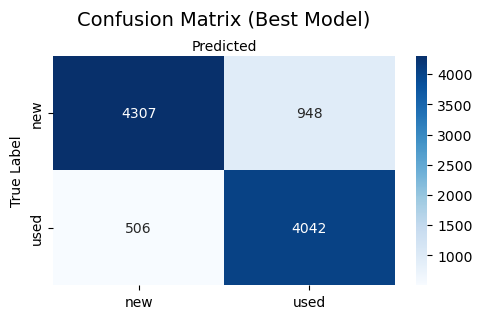

In [479]:
cm = pd.crosstab(y_valid_CB, predict_valid_CB_best, rownames=['True Label'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,3))

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues", fmt='g')
ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix (Best Model)', y=1.1, fontsize=14)
plt.show()

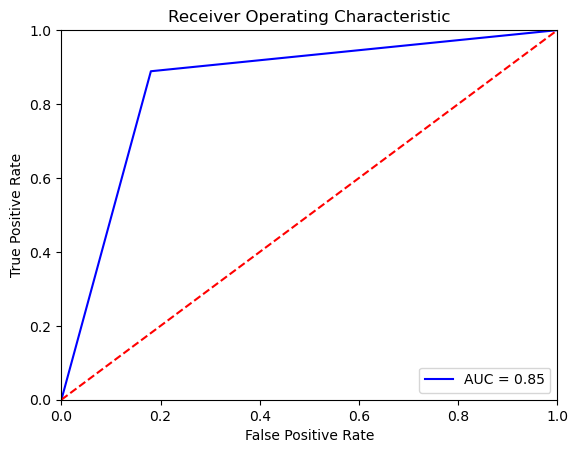

In [481]:
fpr, tpr, threshold = metrics.roc_curve(y_valid_encoded_CB, predict_valid_encoded_CB)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [482]:
classification_report_score_best = classification_report(y_valid_CB, predict_valid_CB)
print(classification_report_score_best)

              precision    recall  f1-score   support

         new       0.90      0.82      0.86      5255
        used       0.81      0.89      0.85      4548

    accuracy                           0.85      9803
   macro avg       0.85      0.86      0.85      9803
weighted avg       0.86      0.85      0.85      9803



#### Test Set

In [483]:
test_data_CB_best = Pool(data=X_test_CB, label=y_test_CB, cat_features=categorical_features)

predict_test_best_CB = model_CB_best.predict(test_data_CB_best)

In [484]:
# Encode the target variable
le = LabelEncoder()
y_train_encoded_CB = le.fit_transform(y_train_CB)
y_test_encoded_CB = le.transform(y_test_CB)
predict_test_encoded_CB = le.transform(predict_test_best_CB)

acc = accuracy_score(y_test_encoded_CB, predict_test_encoded_CB)
print('Accuracy =', acc)

precision = precision_score(y_test_encoded_CB, predict_test_encoded_CB)
print('Precision =', precision)

recall = recall_score(y_test_encoded_CB, predict_test_encoded_CB)
print('Recall =', recall)

auc_score = roc_auc_score(y_test_encoded_CB, predict_test_encoded_CB)
print('AUC =', auc_score)

Accuracy = 0.8567785371824952
Precision = 0.8080438756855576
Recall = 0.896551724137931
AUC = 0.8602214453712391


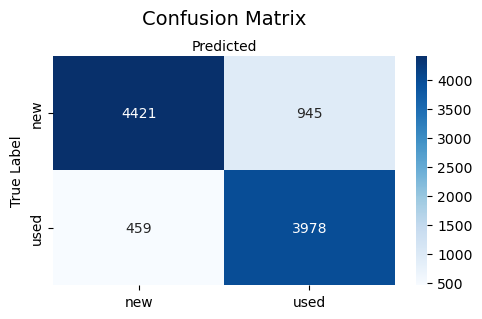

In [485]:
cm = pd.crosstab(y_test_CB, predict_test_best_CB, rownames=['True Label'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,3))

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')

ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1,fontsize=14)
plt.show()

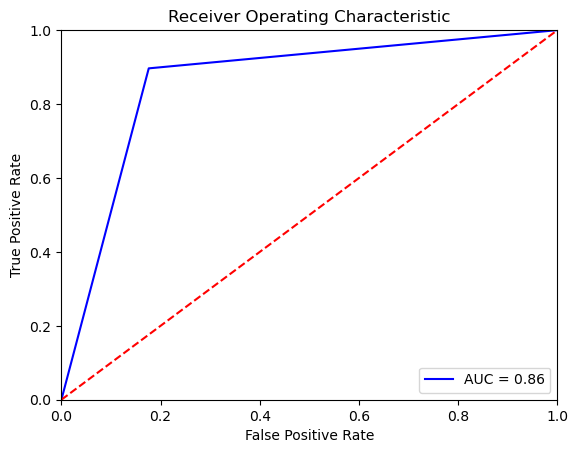

In [486]:
fpr, tpr, threshold = metrics.roc_curve(y_test_encoded_CB, predict_test_encoded_CB)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [487]:
classification_report_score_best_test = classification_report(y_test_CB, predict_test_best_CB)
print(classification_report_score_best_test)

              precision    recall  f1-score   support

         new       0.91      0.82      0.86      5366
        used       0.81      0.90      0.85      4437

    accuracy                           0.86      9803
   macro avg       0.86      0.86      0.86      9803
weighted avg       0.86      0.86      0.86      9803

